## Exploración de Datos (EDA) y Limpieza de Datos

**Objetivo**: Familiarizarse con la estructura, características y posibles problemas de los datasets, además de limpiar los datos si es necesario.

# 1. Importación de Librerías
En esta sección, se importan las librerías necesarias para realizar el análisis. Utilizamos:
- `pandas` para manipulación de datos.
- `seaborn` y `matplotlib` para visualización de datos.
- `scipy` para el análisis estadístico y las pruebas de hipótesis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest


# 2. Carga de los Datasets
Aquí se cargan los tres principales datasets:
- `df_demo`: Contiene datos demográficos de los clientes, como edad, género, y antigüedad en Vanguard.
- `df_web_pt1` y `df_web_pt2`: Son los datos de las interacciones digitales de los clientes con la interfaz.
- `df_experiment`: Indica qué clientes formaron parte del experimento, ya sea en el grupo de control o en el grupo de prueba.

In [2]:
# Cargar los datasets
df_demo = pd.read_csv('df_final_demo.txt', delimiter=',')  # Usa el delimitador adecuado
df_web_pt1 = pd.read_csv('df_final_web_data_pt_1.txt', delimiter=',')
df_web_pt2 = pd.read_csv('df_final_web_data_pt_2.txt', delimiter=',')
df_experiment = pd.read_csv('df_final_experiment_clients.txt', delimiter=',')



# 3. Función para Exploración de Datos
Se define una función `df_exploration()` para hacer una exploración inicial de cada dataset, revisando lo siguiente:
- Información general del dataset (`info()`), incluyendo tipos de datos.
- Número de valores duplicados.
- Número de valores nulos por columna.
- Cantidad de valores únicos por columna.

In [3]:
# Función para exploración de los datos
def df_exploration(df):
    # Revisión básica de los datos
    print(df.info())  # Para revisar los tipos de datos
    print(f"\nValores duplicados: {df.duplicated().sum()}")  # Revisa si hay duplicados en los datasets
    print(f"\nValores nulos: \n{df.isnull().sum()}") # Revisar valores nulos
    print (f"\nValores unicos: \n{df.nunique()}") # Revisar valores unicos
    return df



# 4. Exploración de Datos Demográficos
Utilizamos la función de exploración en el dataset de demografía (`df_demo`). Esto nos permite entender mejor su estructura y detectar posibles problemas, como valores faltantes o duplicados.

In [4]:
# Exploración de los datos demograficos

df_exploration(df_demo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

Valores unicos: 
client_id           70609
clnt

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


Eliminamos clientes que tienen todos los valores nulos

In [5]:
df_demo = df_demo.dropna(how='all', subset=df_demo.columns.difference(['client_id']))

Sustituimos el valor nulo de la edad por la media

In [6]:
# Sustituir los valores nulos en 'clnt_age' por la media calculada
df_demo['clnt_age'].fillna(round(df_demo['clnt_age'].mean()), inplace=True)


C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18372\397182858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['clnt_age'].fillna(round(df_demo['clnt_age'].mean()), inplace=True)


Formateamos los valores de Genero a F, M, U

In [7]:
df_demo['gendr'].value_counts()

U    24122
M    23724
F    22746
X        3
Name: gendr, dtype: int64

In [8]:
# Reemplazar los valores 'X' por 'U'
df_demo['gendr'] = df_demo['gendr'].replace('X', 'U')

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18372\2751592922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['gendr'] = df_demo['gendr'].replace('X', 'U')


# 5. Exploración de las Huellas Digitales (Parte 1 y Parte 2)
En esta sección, exploramos los datasets correspondientes a las huellas digitales de los clientes (`df_web_pt1` y `df_web_pt2`).
Verificamos su estructura y las posibles anomalías, como valores nulos o duplicados. Dado que las huellas digitales están divididas en dos partes (`df_web_pt1` y `df_web_pt2`), realizamos una unión de ambos datasets para poder analizarlos de manera conjunta.

In [9]:
# Exploración de los datos web parte 1

df_exploration(df_web_pt1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB
None

Valores duplicados: 2095

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Valores unicos: 
client_id        58391
visitor_id       62936
visit_id         75256
process_step         5
date_time       282666
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [10]:
# Exploración de los datos web parte 2

df_exploration(df_web_pt2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB
None

Valores duplicados: 8669

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Valores unicos: 
client_id        67430
visitor_id       71042
visit_id         82841
process_step         5
date_time       346697
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


Unimos los df con el registro detallado de las interacciones de los clientes.

In [11]:
# Unir los datasets pt_1 y pt_2
df_web_combined = pd.concat([df_web_pt1, df_web_pt2], axis=0, ignore_index=True)

In [12]:
# Revisión del nuevo df
df_exploration(df_web_combined)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB
None

Valores duplicados: 10764

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Valores unicos: 
client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


Formatear la columna 'date_time' a datetime

In [13]:
# Convertir la columna 'date_time' a datetime
df_web_combined['date_time'] = pd.to_datetime(df_web_combined['date_time'], format='%Y-%m-%d %H:%M:%S')

In [14]:
# Revisión del nuevo df
df_exploration(df_web_combined)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     755405 non-null  int64         
 1   visitor_id    755405 non-null  object        
 2   visit_id      755405 non-null  object        
 3   process_step  755405 non-null  object        
 4   date_time     755405 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 28.8+ MB
None

Valores duplicados: 10764

Valores nulos: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

Valores unicos: 
client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [15]:
# Eliminar duplicados
df_web_combined.drop_duplicates(inplace=True)

Cambiamos el nombre de los pasos por números para darle un orden

In [16]:
# Renombrar los pasos a un formato numerico: 'start' por 1, 'step_1' por 2, 'step_2' por 3, 'step_3' por 4, 'confirm' por 5
df_web_combined["process_step"] = df_web_combined["process_step"].replace({'start' : 1, 'step_1' : 2, 'step_2' : 3, 'step_3' : 4, 'confirm' : 5})

In [17]:
df_web_combined

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,4,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,4,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,4,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,1,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,1,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,2,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,1,2017-05-24 18:44:34


**Analizamos cómo se comportan las variables `client_id`, `visitor_id` y `visit_id`**

El dataframe resultante `client_id_summary` proporciona una visión completa del comportamiento de los clientes en términos de frecuencia de visitas y número de visitantes únicos.

In [18]:
# Contar el número de visitor_id únicos por cada client_id
unique_visitors = df_web_combined.groupby('client_id')['visitor_id'].nunique().reset_index()
unique_visitors.columns = ['client_id', 'unique_visitor_count']

# Contar el número de visit_id únicos por cada client_id
unique_visits = df_web_combined.groupby('client_id')['visit_id'].nunique().reset_index()
unique_visits.columns = ['client_id', 'unique_visit_count']

# Contar el número de visit_id únicos por cada combinación de client_id y visitor_id
unique_visits_by_visitor = df_web_combined.groupby(['client_id', 'visitor_id'])['visit_id'].nunique().reset_index()
unique_visits_by_visitor.columns = ['client_id', 'visitor_id', 'unique_visit_count_per_visitor']

# Unir los DataFrames en uno solo
client_id_summary = pd.merge(unique_visitors, unique_visits, on='client_id', how='outer')
client_id_summary = pd.merge(client_id_summary, unique_visits_by_visitor.groupby('client_id')['unique_visit_count_per_visitor'].sum().reset_index(), on='client_id', how='outer')

In [19]:
client_id_summary

,client_id,unique_visitor_count,unique_visit_count,unique_visit_count_per_visitor
0,169,1,1,1
1,336,1,1,1
2,546,1,1,1
3,555,1,1,1
4,647,1,1,1
...,...,...,...,...
120152,9999729,3,3,3
120153,9999768,1,1,1
120154,9999832,1,1,1
120155,9999839,1,1,1


## 5.1 Calculamos cuánto tiempo tarda cada cliente en pasar de un paso al siguiente

Ordenamos el dataset `df_web_combined` según los campos `client_id`, `visit_id` y `date_time`. Esto asegura que, para cada cliente (client_id) y visita (visit_id), los eventos o interacciones aparezcan en orden cronológico según la columna `date_time`. Esta organización es esencial para calcular el tiempo entre pasos consecutivos de navegación.

Agrupamos los datos por `client_id` y `visit_id`. Luego, con el método `shift(-1)`, desplazamos las fechas en la columna `date_time` una fila hacia arriba, de manera que para cada fila actual, se obtenga la hora del siguiente paso dentro del mismo cliente y visita. Esto crea una nueva columna `next_date_time`, que representa el tiempo en el que ocurrió la siguiente interacción.

Calculamos la diferencia de tiempo entre el paso actual y el siguiente restando `date_time` del paso actual de la columna `next_date_time` (hora del siguiente paso). Esto genera una columna `time_diff` que contiene la duración entre dos eventos consecutivos de un cliente en la misma visita.

 Finalmente, convertimos la diferencia de tiempo, que está en formato de `timedelta`, a segundos usando la función `total_seconds()`.

In [20]:
# Ordenar los datos por client_id, visit_id y date_time
web_data_final = df_web_combined.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Añadir la hora del paso posterior
web_data_final['next_date_time'] = web_data_final.groupby(['client_id', 'visit_id'])['date_time'].shift(-1)

# Calcular la diferencia de tiempo entre el paso actual y el siguiente
web_data_final['time_diff'] = web_data_final['next_date_time'] - web_data_final['date_time']

# Convertir la diferencia de tiempo a segundos
web_data_final['time_diff_seconds'] = web_data_final['time_diff'].dt.total_seconds()

In [21]:
web_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744641 entries, 285515 to 648529
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   client_id          744641 non-null  int64          
 1   visitor_id         744641 non-null  object         
 2   visit_id           744641 non-null  object         
 3   process_step       744641 non-null  int64          
 4   date_time          744641 non-null  datetime64[ns] 
 5   next_date_time     585529 non-null  datetime64[ns] 
 6   time_diff          585529 non-null  timedelta64[ns]
 7   time_diff_seconds  585529 non-null  float64        
dtypes: datetime64[ns](2), float64(1), int64(2), object(2), timedelta64[ns](1)
memory usage: 51.1+ MB


Realizamos una primera visualización de cómo se distribuyen los pasos

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18372\1082311122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=process_counts.index, y=process_counts.values, palette='viridis')


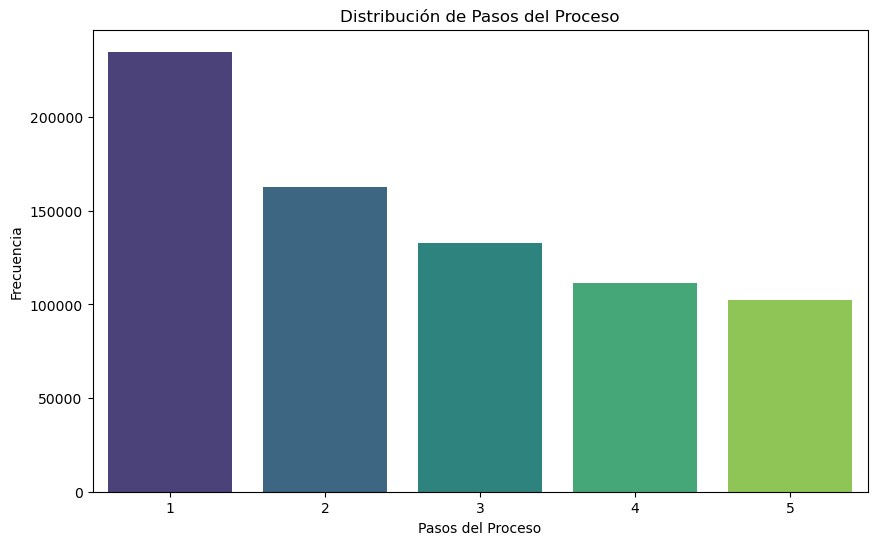

In [22]:
# Contar la frecuencia de cada 'process_step'
process_counts = df_web_combined['process_step'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=process_counts.index, y=process_counts.values, palette='viridis')
plt.title('Distribución de Pasos del Proceso')
plt.xlabel('Pasos del Proceso')
plt.ylabel('Frecuencia')
plt.show()

# 6. Exploración de los Clientes del Experimento
Aquí se explora el dataset `df_experiment`, que contiene información sobre qué clientes participaron en el experimento y si estuvieron en el grupo de control o el grupo de prueba.

In [23]:
# Exploración del df de clientes de control y test

df_exploration(df_experiment)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id        0
Variation    20109
dtype: int64

Valores unicos: 
client_id    70609
Variation        2
dtype: int64


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [24]:
# Eliminamos valores nulos
df_experiment.dropna(inplace=True)

# 7. Análisis del Comportamiento del Cliente

Objetivo: Entender el perfil de los clientes que usan el proceso online.


In [25]:
# Estadísticas descriptivas
df_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.059500e+04,70595.000000,70595.000000,70595.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.005021e+06,12.052950,150.659367,46.442234,2.255528,1.474452e+05,3.382478,5.566740
std,2.877269e+06,6.871819,82.089854,15.591162,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519604e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016969e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483064e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


## 7.1 Análisis univariable

**Edad de los clientes**

Visualizamos la distribución de la edad para entender si los clientes más jóvenes o mayores son los que más utilizan el servicio.

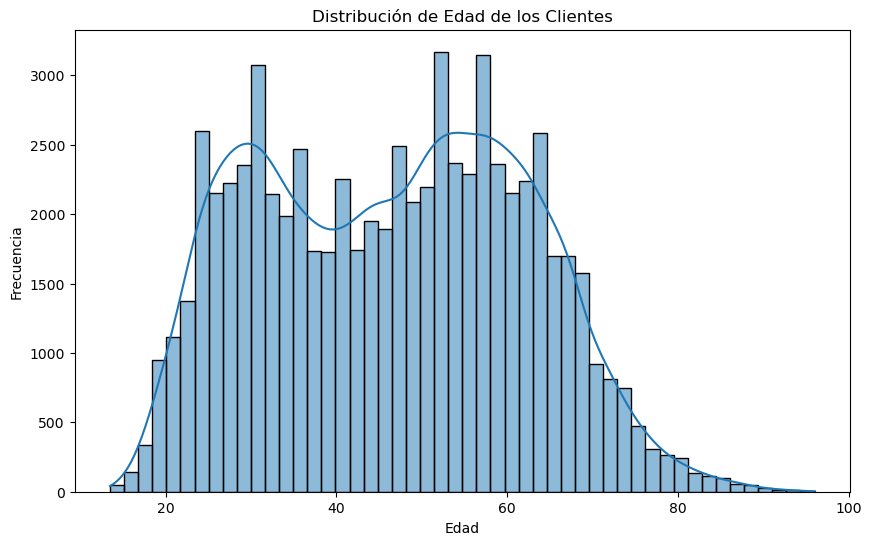

In [26]:
# Visualización de la distribución de edades
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_demo['clnt_age'], bins=50, kde=True)
plt.title('Distribución de Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Duración como clientes**

Compara clientes nuevos frente a los clientes con mayor antigüedad

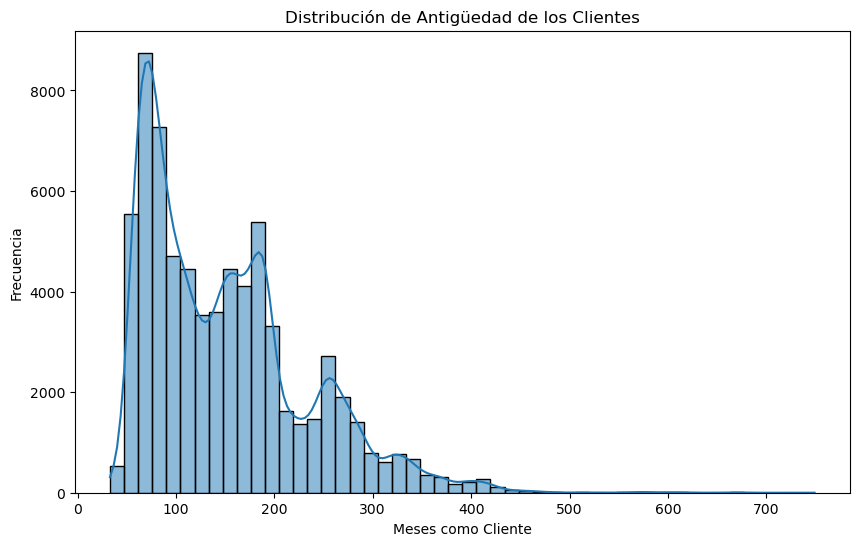

In [27]:
# Visualización de la distribución de tenencia
plt.figure(figsize=(10, 6))
sns.histplot(df_demo['clnt_tenure_mnth'], bins=50, kde=True)
plt.title('Distribución de Antigüedad de los Clientes')
plt.xlabel('Meses como Cliente')
plt.ylabel('Frecuencia')
plt.show()

**Distribución por género**

Exploramos la proporción de clientes según su género


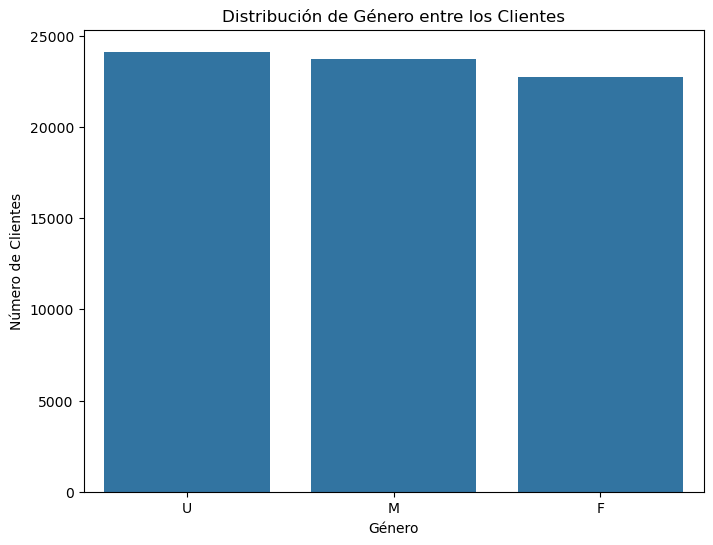

In [28]:
# Conteo de clientes por género
plt.figure(figsize=(8, 6))
sns.countplot(x='gendr', data=df_demo)
plt.title('Distribución de Género entre los Clientes')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

¿Qué tan a menudo inician sesión los clientes?

¿Cuántas veces contactan al servicio de atención al cliente?

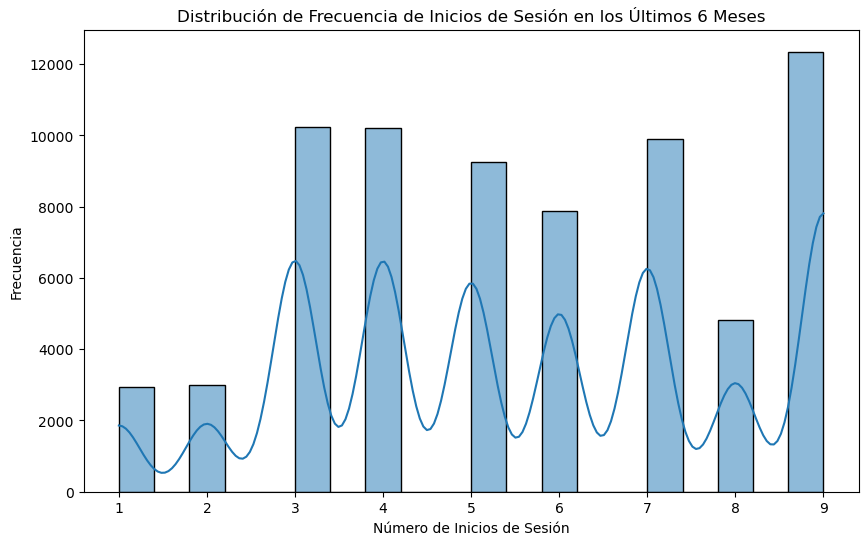

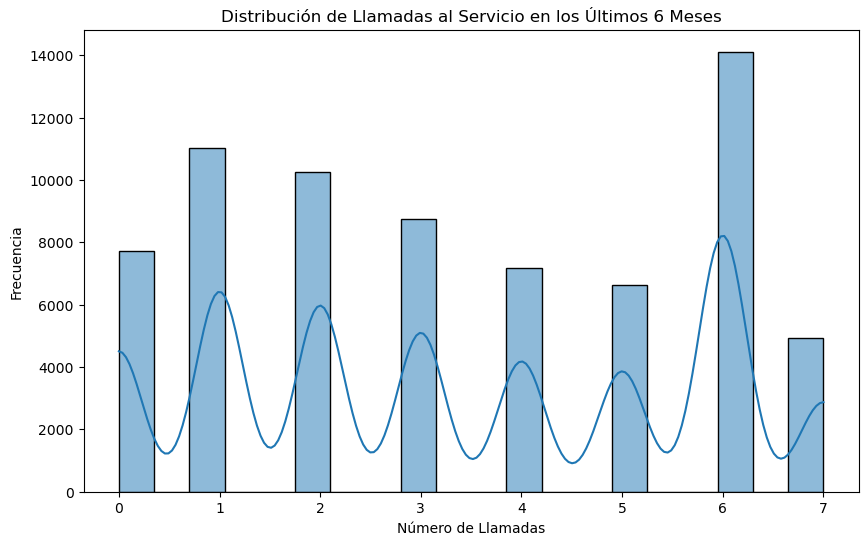

In [29]:
# Visualizar frecuencia de inicio de sesión
plt.figure(figsize=(10, 6))
sns.histplot(df_demo['logons_6_mnth'], bins=20, kde=True)
plt.title('Distribución de Frecuencia de Inicios de Sesión en los Últimos 6 Meses')
plt.xlabel('Número de Inicios de Sesión')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar frecuencia de llamadas al servicio de atención
plt.figure(figsize=(10, 6))
sns.histplot(df_demo['calls_6_mnth'], bins=20, kde=True)
plt.title('Distribución de Llamadas al Servicio en los Últimos 6 Meses')
plt.xlabel('Número de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

## 7.2 Análisis bivariable

Calculamos la matriz de correlación entre las variables numéricas seleccionadas utilizando el método de correlación de Spearman.

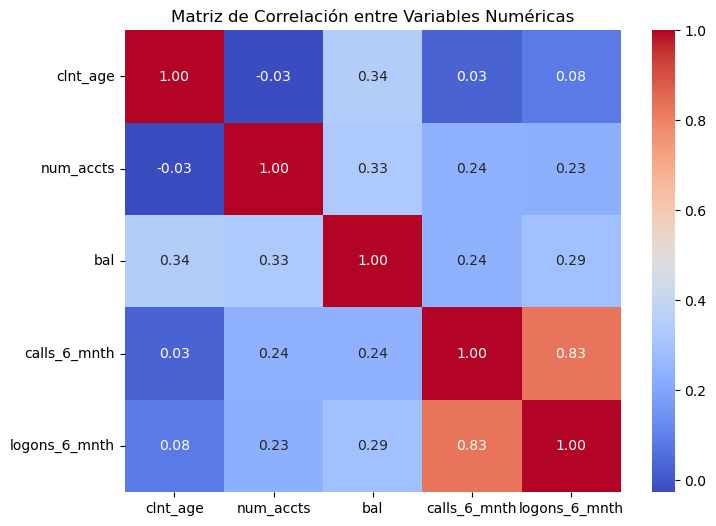

In [30]:
# Primero, seleccionamos las variables numéricas
numeric_vars = df_demo[['clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']]
# Calculamos la matriz de correlación
correlation_matrix = numeric_vars.corr(method='spearman')

# Visualizamos la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()



Realizamos una exploración visual inicial de las relaciones y distribuciones de las variables numéricas en el dataset, lo cual es clave para detectar patrones, correlaciones o anomalías que podrían ser importantes para el análisis posterior.

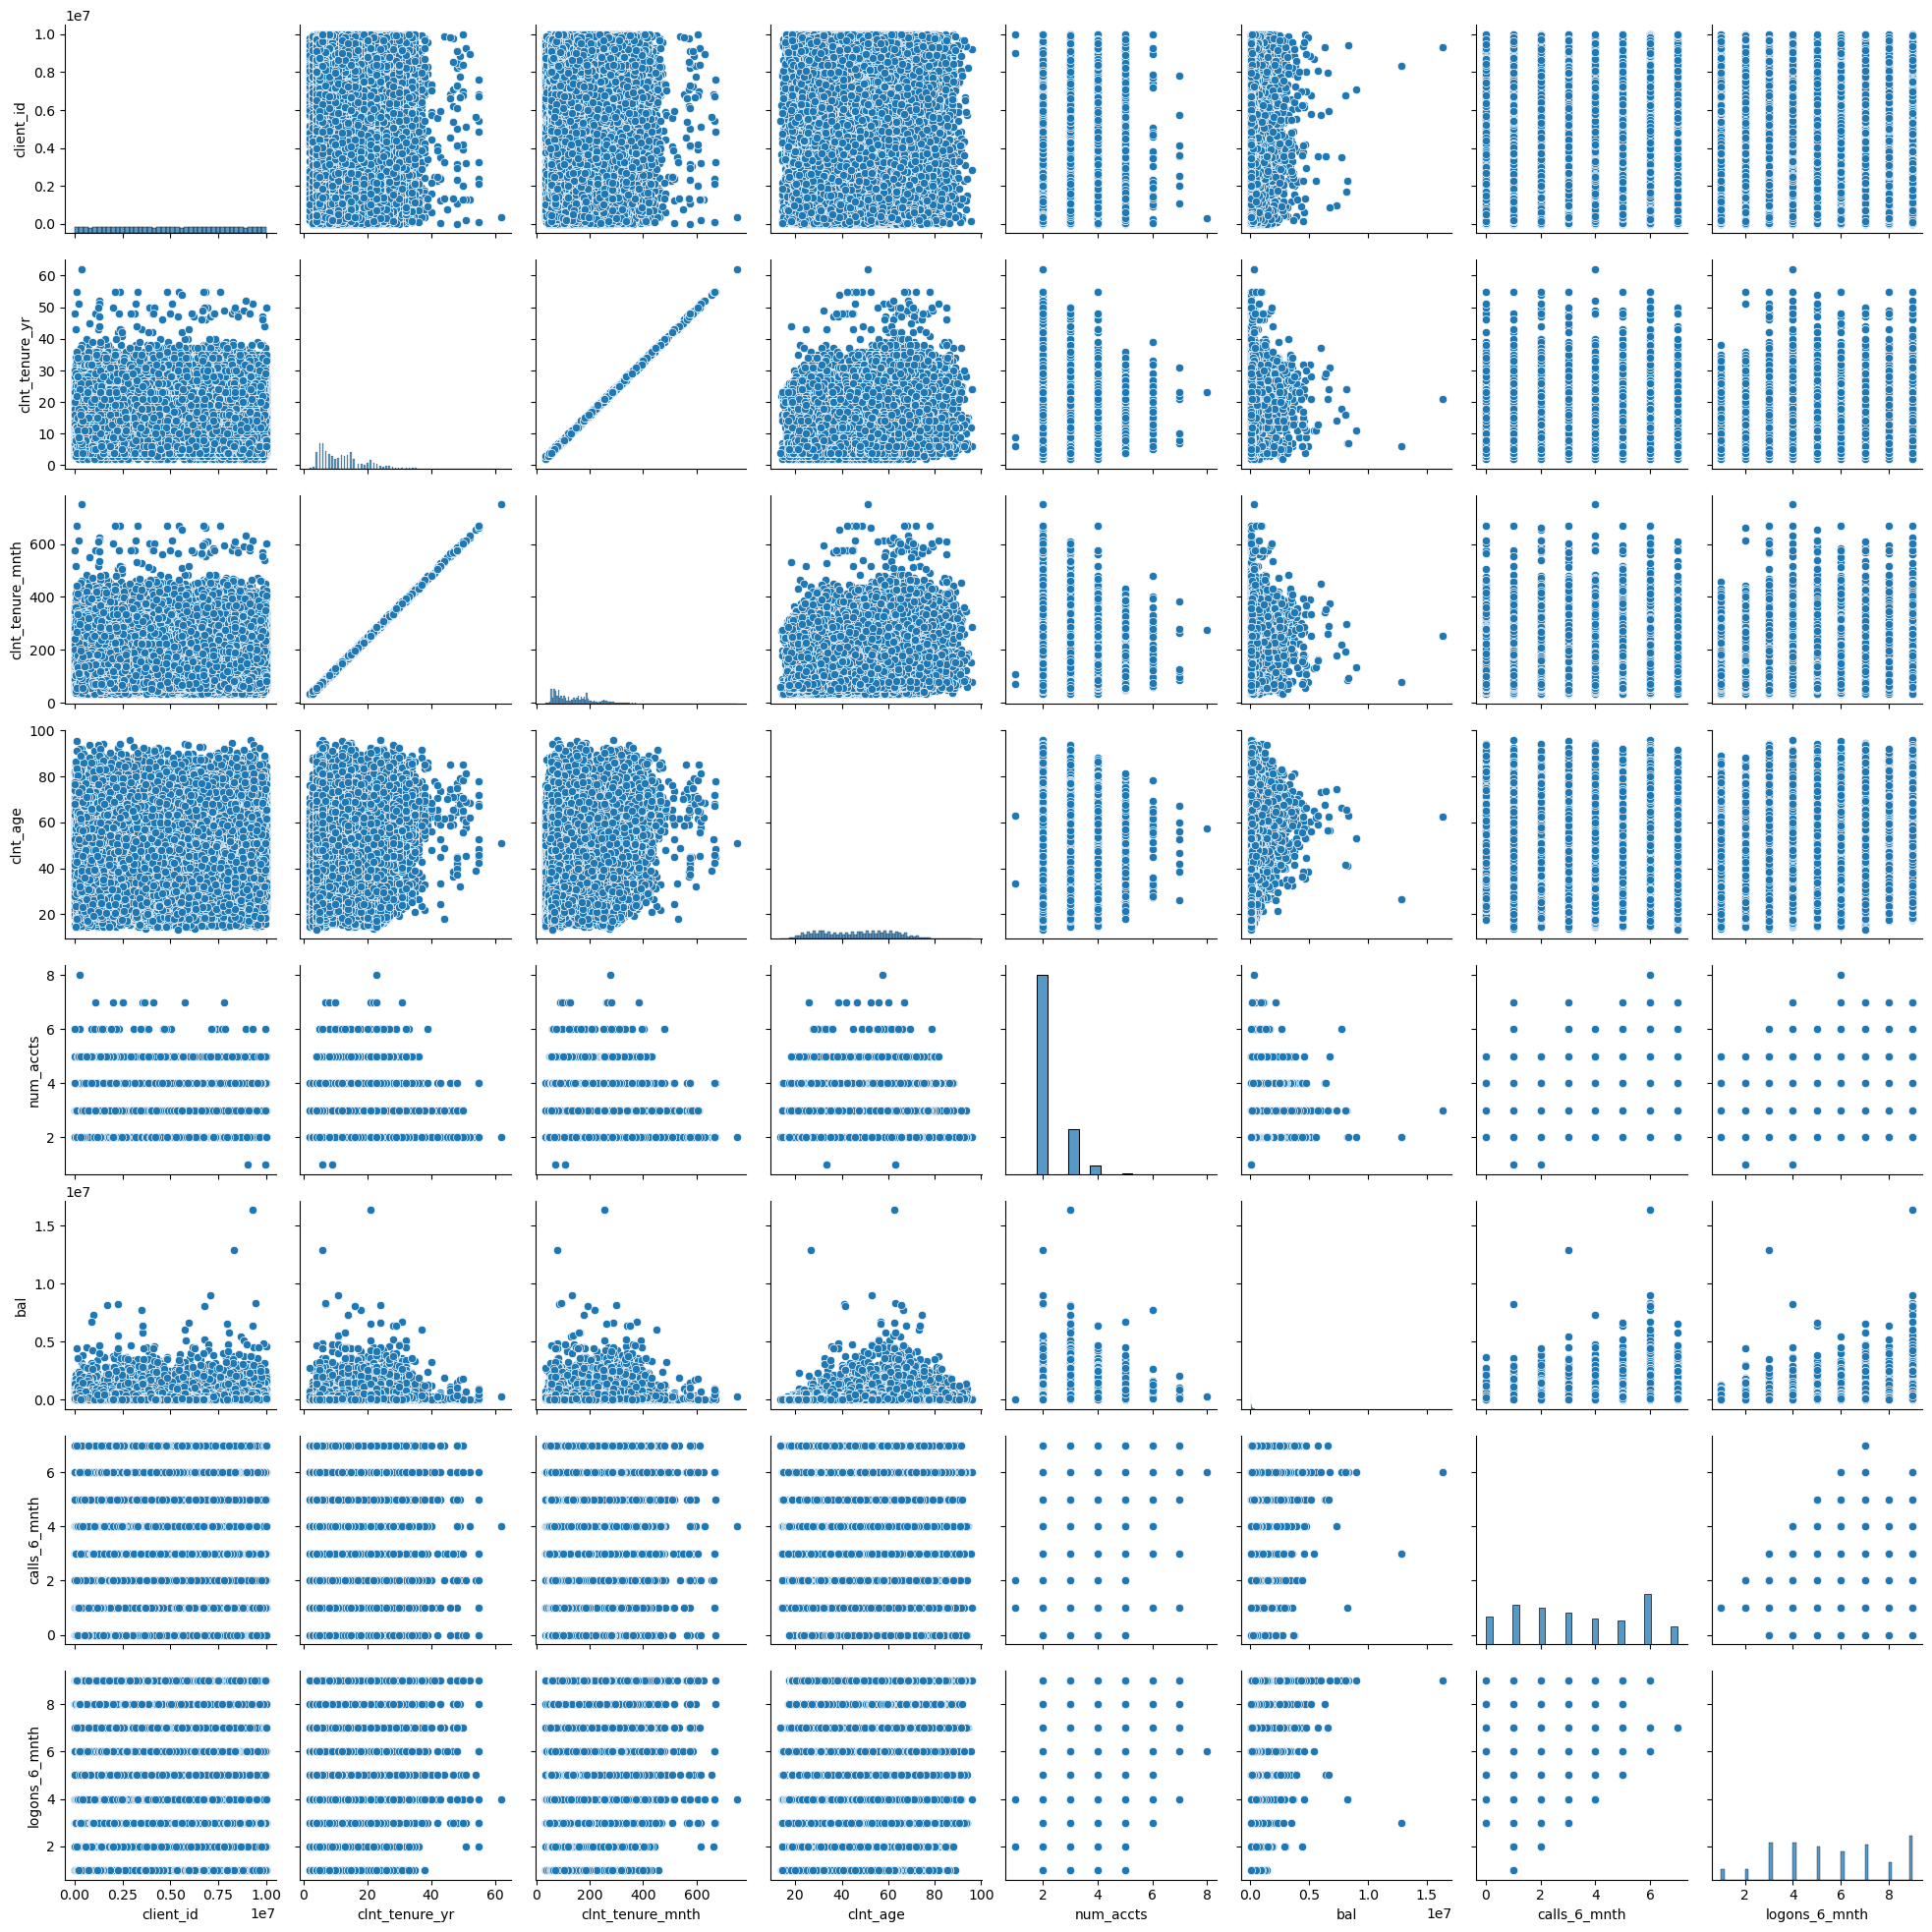

In [31]:
# Grafica de dispersión de balance y edad
sns.pairplot(df_demo)


**Relación entre  género y número de cuentas**

¿Existe una relación significativa entre el género y el número de cuentas que los clientes tienen?

Esto se hace mediante una prueba Chi-Cuadrado y se visualiza con un gráfico de barras.

In [32]:
# Creando una tabla de contingencia para Género y Número de cuentas
contingency_table = pd.crosstab(df_demo['gendr'], df_demo['num_accts'])

# Aplicando la prueba Chi-Cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-cuadrado: {chi2}, p-valor: {p_value}')

# Interpretación del p-valor
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: existe una relación significativa entre Género y Número de cuentas.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que existe una relación significativa.")

Chi-cuadrado: 697.0795477597428, p-valor: 1.0834286501848828e-139
Se rechaza la hipótesis nula: existe una relación significativa entre Género y Número de cuentas.


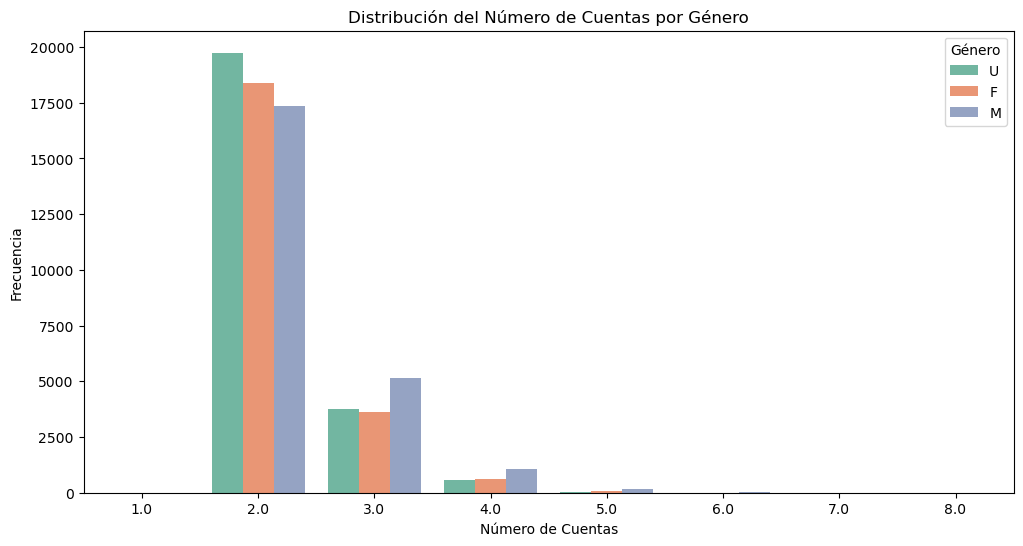

In [33]:
# Crear un gráfico de barras agrupadas: Distribución del Número de Cuentas por Género
plt.figure(figsize=(12, 6))
sns.countplot(data=df_demo, x='num_accts', hue='gendr', palette='Set2')

plt.title('Distribución del Número de Cuentas por Género')
plt.xlabel('Número de Cuentas')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.show()

**Relación entre  género y número de llamadas**

¿Existe una relación significativa entre el género y el número de llamadas que hacen los clientes?

Esto se hace mediante una prueba Chi-Cuadrado y se visualiza con un gráfico de barras.

In [34]:
# Creando una tabla de contingencia para Género y Número de llamadas
contingency_table = pd.crosstab(df_demo['gendr'], df_demo['calls_6_mnth'])

# Aplicando la prueba Chi-Cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-cuadrado: {chi2}, p-valor: {p_value}')

# Interpretación del p-valor
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: existe una relación significativa entre Género y Número de llamadas.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que existe una relación significativa.")

Chi-cuadrado: 935.9281707480802, p-valor: 8.616180589029502e-191
Se rechaza la hipótesis nula: existe una relación significativa entre Género y Número de llamadas.


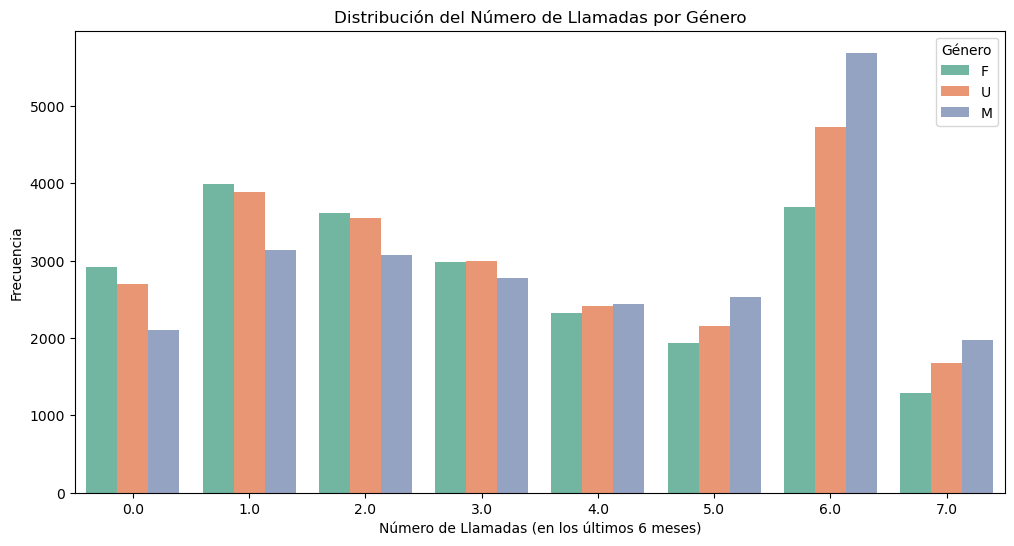

In [35]:
# Crear un gráfico de barras agrupadas: Distribución del Número de Llamadas por Género
plt.figure(figsize=(12, 6))
sns.countplot(data=df_demo, x='calls_6_mnth', hue='gendr', palette='Set2')

plt.title('Distribución del Número de Llamadas por Género')
plt.xlabel('Número de Llamadas (en los últimos 6 meses)')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.show()

**Relación entre  género y número de inicios de sesión**

¿Existe una relación significativa entre el género y el número de inicios de sesión que hacen los clientes?

Esto se hace mediante una prueba Chi-Cuadrado y se visualiza con un gráfico de barras.

In [36]:
# Creando una tabla de contingencia para Género y Número de logons
contingency_table = pd.crosstab(df_demo['gendr'], df_demo['logons_6_mnth'])

# Aplicando la prueba Chi-Cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-cuadrado: {chi2}, p-valor: {p_value}')

# Interpretación del p-valor
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: existe una relación significativa entre Género y Número de logs.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que existe una relación significativa.")

Chi-cuadrado: 839.59395234399, p-valor: 2.241916225398802e-168
Se rechaza la hipótesis nula: existe una relación significativa entre Género y Número de logs.


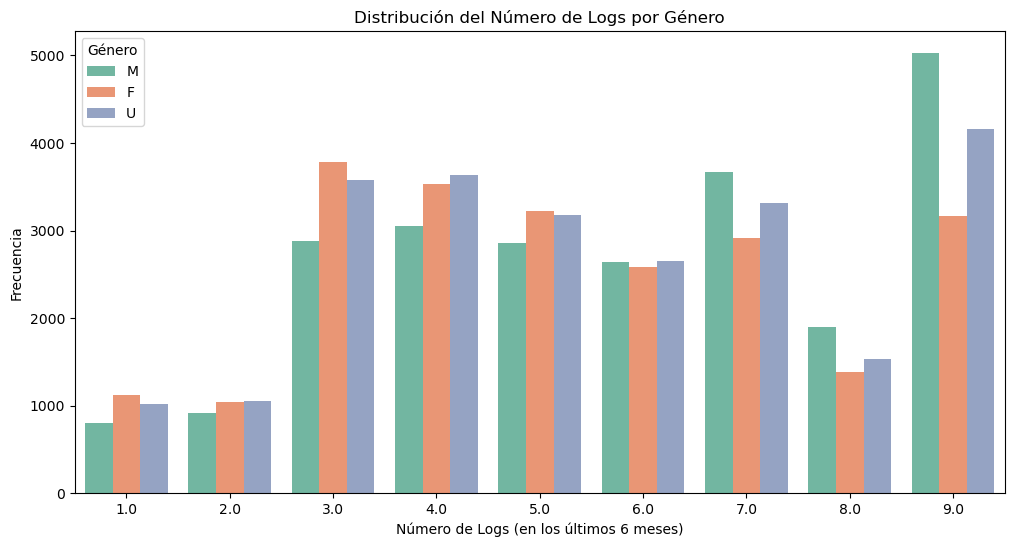

In [37]:
# Crear un gráfico de barras agrupadas: Distribución del Número de Logs por Género
plt.figure(figsize=(12, 6))
sns.countplot(data=df_demo, x='logons_6_mnth', hue='gendr', palette='Set2')

plt.title('Distribución del Número de Logs por Género')
plt.xlabel('Número de Logs (en los últimos 6 meses)')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.show()

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18372\2244245006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_demo, x='num_accts', y='clnt_age', palette="coolwarm")
C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18372\2244245006.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Género')


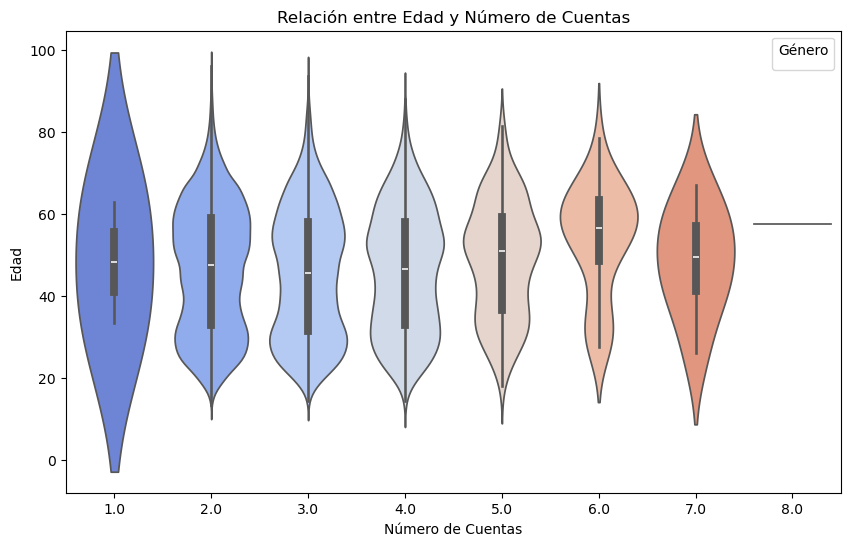

In [38]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_demo, x='num_accts', y='clnt_age', palette="coolwarm")
plt.title('Relación entre Edad y Número de Cuentas')
plt.xlabel('Número de Cuentas')
plt.ylabel('Edad')
plt.legend(title='Género')
plt.show()



# 8. Cálculo de KPIs y Métricas de Rendimiento

Definimos y calculamos los indicadores clave de rendimiento (KPIs) como la tasa de finalización, el tiempo en cada paso y las tasas de error. Estos KPIs nos permitirán evaluar el rendimiento de la nueva interfaz comparado con la antigua.

## 8.1 Unir df_web_combined y df_experiment

df_merged contendrá todos los datos de `df_web` junto con las columnas de `df_experiment` que tienen un `client_id` coincidente.

In [39]:
# Unir los DataFrames por 'client_id'
df_merged = pd.merge(web_data_final, df_experiment, on='client_id', how='inner')

In [40]:
# Ordenar los datos por 'client_id', 'visit_id', 'date_time'
df_merged = df_merged.sort_values(by=['client_id', 'visit_id', 'date_time'])

Exploramos el nuevo df

In [41]:
df_exploration(df_merged)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317235 entries, 0 to 317234
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   client_id          317235 non-null  int64          
 1   visitor_id         317235 non-null  object         
 2   visit_id           317235 non-null  object         
 3   process_step       317235 non-null  int64          
 4   date_time          317235 non-null  datetime64[ns] 
 5   next_date_time     247788 non-null  datetime64[ns] 
 6   time_diff          247788 non-null  timedelta64[ns]
 7   time_diff_seconds  247788 non-null  float64        
 8   Variation          317235 non-null  object         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3), timedelta64[ns](1)
memory usage: 24.2+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id                0
visitor_id               0
visit_id                 0
process_step             0
date_tim

,client_id,visitor_id,visit_id,process_step,date_time,next_date_time,time_diff,time_diff_seconds,Variation
0,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:57:56,2017-04-15 12:58:03,0 days 00:00:07,7.0,Test
1,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:03,2017-04-15 12:58:35,0 days 00:00:32,32.0,Test
2,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 12:58:35,2017-04-15 13:00:14,0 days 00:01:39,99.0,Test
3,555,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:14,2017-04-15 13:00:34,0 days 00:00:20,20.0,Test
4,555,402506806_56087378777,637149525_38041617439_716659,5,2017-04-15 13:00:34,NaT,NaT,NaN,Test
...,...,...,...,...,...,...,...,...,...
317230,9999729,834634258_21862004160,870243567_56915814033_814203,5,2017-05-08 16:09:40,NaT,NaT,NaN,Test
317231,9999729,604429154_69247391147,99583652_41711450505_426179,1,2017-04-05 13:40:49,2017-04-05 13:41:04,0 days 00:00:15,15.0,Test
317232,9999729,604429154_69247391147,99583652_41711450505_426179,2,2017-04-05 13:41:04,NaT,NaT,NaN,Test
317233,9999832,145538019_54444341400,472154369_16714624241_585315,1,2017-05-16 16:46:03,2017-05-16 16:46:11,0 days 00:00:08,8.0,Test


**Realizamos una primera observación de cómo se distribuyen los datos de control y test**

In [42]:
df_merged['Variation'].value_counts()

Test       176699
Control    140536
Name: Variation, dtype: int64

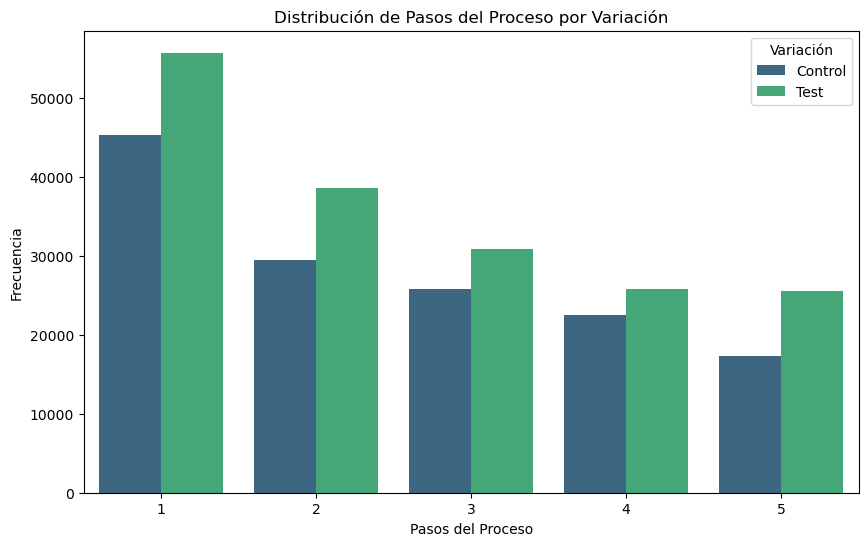

In [43]:
# Contar la frecuencia de cada 'process_step' y agregar la variación
process_counts = df_merged.groupby(['process_step', 'Variation']).size().reset_index(name='counts')

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=process_counts, x='process_step', y='counts', hue='Variation', palette='viridis')

plt.title('Distribución de Pasos del Proceso por Variación')
plt.xlabel('Pasos del Proceso')
plt.ylabel('Frecuencia')
plt.legend(title='Variación')  # Título para la leyenda
plt.show()

## 8.2 Tasa de Finalización

Se calcula la tasa de finalización, uno de los KPI clave, para comparar la efectividad del nuevo diseño con el diseño tradicional.
La tasa de finalización se define como el porcentaje de usuarios que llegan a la página de confirmación final.

In [44]:
# Filtrar las filas donde el process_step sea 'confirm'
completion_df = df_merged[df_merged['process_step'] == 5]

# Contar el número de visitas únicas (visit_id) que completaron el proceso para cada variación
completion_rate_control = completion_df[completion_df['Variation'] == 'Control']['visit_id'].nunique() / df_merged[df_merged['Variation'] == 'Control']['visit_id'].nunique()
completion_rate_test = completion_df[completion_df['Variation'] == 'Test']['visit_id'].nunique() / df_merged[df_merged['Variation'] == 'Test']['visit_id'].nunique()

print(f'Tasa de finalización - Control: {completion_rate_control:.2%}')
print(f'Tasa de finalización - Test: {completion_rate_test:.2%}')

Tasa de finalización - Control: 49.85%
Tasa de finalización - Test: 58.52%


**Creamos el df `success_summary`, que indica si cada cliente ha tenido éxito o no**

In [45]:
# Determinar si el cliente llegó al paso 5
success_summary = df_merged.groupby('client_id')['process_step'].max().reset_index()

# Añadir una columna que indique si tuvo éxito (si el paso 5 está presente)
success_summary['success'] = success_summary['process_step'] == 5

In [46]:
success_summary

,client_id,process_step,success
0,555,5,True
1,647,5,True
2,934,1,False
3,1028,4,False
4,1104,1,False
...,...,...,...
50495,9999150,2,False
50496,9999400,5,True
50497,9999626,2,False
50498,9999729,5,True


## 8.3 Tiempo en Cada Paso

Analizamos el tiempo que los usuarios pasan en cada paso del proceso. Esto nos permite evaluar si el nuevo diseño ayuda a reducir el tiempo de interacción de los clientes con la interfaz.

**Calculamos la media de tiempo para cada paso, diferenciando entre control y test**

In [47]:
# Calcular la media de 'time_diff_seconds' para cada 'process_step'
time_diff_sum = df_merged.groupby(['Variation', 'process_step'])['time_diff_seconds'].mean().reset_index()
time_diff_sum.head(20)

,Variation,process_step,time_diff_seconds
0,Control,1,66.826566
1,Control,2,50.468456
2,Control,3,92.004730
3,Control,4,137.135454
4,Control,5,168.727083
5,Test,1,61.471494
6,Test,2,60.675430
7,Test,3,88.849153
8,Test,4,129.636784
9,Test,5,243.690389


**calculamos el tiempo total** que cada cliente ha pasado en **cada paso** del proceso, agrupando también por grupo de control o test del experimento.

In [48]:
time_per_client_step = df_merged.groupby(['client_id', 'process_step', 'Variation'])['time_diff_seconds'].sum().reset_index()
time_per_client_step.head(20)

,client_id,process_step,Variation,time_diff_seconds
0,555,1,Test,7.0
1,555,2,Test,32.0
2,555,3,Test,99.0
3,555,4,Test,20.0
4,555,5,Test,0.0
5,647,1,Test,7.0
6,647,2,Test,18.0
7,647,3,Test,189.0
8,647,4,Test,163.0
9,647,5,Test,0.0


**calculamos el tiempo total** del proceso que ha pasado cada cliente, agrupando también por grupo de control o test del experimento.

In [49]:
time_by_client = df_merged.groupby('client_id')['time_diff_seconds'].sum().reset_index()
time_by_client

,client_id,time_diff_seconds
0,555,158.0
1,647,377.0
2,934,142.0
3,1028,538.0
4,1104,0.0
...,...,...
50495,9999150,18.0
50496,9999400,119.0
50497,9999626,8.0
50498,9999729,540.0


## 8.4  Tasa de Errores
Se evalúa la tasa de errores, que corresponde a los casos en que los usuarios retroceden en el proceso de navegación. Un alto porcentaje de retrocesos puede indicar confusión o problemas de usabilidad.

In [50]:
df_merged

,client_id,visitor_id,visit_id,process_step,date_time,next_date_time,time_diff,time_diff_seconds,Variation
0,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:57:56,2017-04-15 12:58:03,0 days 00:00:07,7.0,Test
1,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:03,2017-04-15 12:58:35,0 days 00:00:32,32.0,Test
2,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 12:58:35,2017-04-15 13:00:14,0 days 00:01:39,99.0,Test
3,555,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:14,2017-04-15 13:00:34,0 days 00:00:20,20.0,Test
4,555,402506806_56087378777,637149525_38041617439_716659,5,2017-04-15 13:00:34,NaT,NaT,NaN,Test
...,...,...,...,...,...,...,...,...,...
317230,9999729,834634258_21862004160,870243567_56915814033_814203,5,2017-05-08 16:09:40,NaT,NaT,NaN,Test
317231,9999729,604429154_69247391147,99583652_41711450505_426179,1,2017-04-05 13:40:49,2017-04-05 13:41:04,0 days 00:00:15,15.0,Test
317232,9999729,604429154_69247391147,99583652_41711450505_426179,2,2017-04-05 13:41:04,NaT,NaT,NaN,Test
317233,9999832,145538019_54444341400,472154369_16714624241_585315,1,2017-05-16 16:46:03,2017-05-16 16:46:11,0 days 00:00:08,8.0,Test


Usamos `shift(1)` para desplazar la columna `process_step` una fila hacia abajo para cada grupo. Esto crea una nueva columna `previous_step` que representa el paso anterior del cliente.

El propósito de esto es comparar el paso actual con el paso anterior para identificar si el cliente ha retrocedido en el proceso.

In [51]:
# KPI 3: Tasa de error
df_merged['previous_step'] = df_merged.groupby(['client_id', 'visit_id'])['process_step'].shift(1)
df_merged['error'] = df_merged['process_step'] < df_merged['previous_step']  # True si hay un regreso


**Calculamos la tasa error para cada grupo**

In [52]:
# Calcular la tasa de error por grupo (Control y Test)
error_rates = df_merged.groupby('Variation')['error'].mean().reset_index()
error_rates

,Variation,error
0,Control,0.068175
1,Test,0.091862


Además de simplemente saber si han cometido errores o no, podemos saber cuántas veces se equivocan

In [53]:
# Agrupar por client_id para contar la cantidad de errores
error_count_summary = df_merged.groupby('client_id')['error'].sum().reset_index()
error_count_summary.columns = ['client_id', 'error_count']

In [54]:
error_count_summary

,client_id,error_count
0,555,0
1,647,0
2,934,0
3,1028,2
4,1104,0
...,...,...
50495,9999150,1
50496,9999400,0
50497,9999626,0
50498,9999729,1


# 9. Agrupamos los datos para el estudio estadístico

In [55]:
# Agrupar por client_id para contar la cantidad de errores por cliente y lo unimos con el summary
error_summary = df_merged.groupby(['client_id', 'Variation'])['error'].any().reset_index()
error_summary = pd.merge(error_summary, error_count_summary, on='client_id', how='left')
error_summary

,client_id,Variation,error,error_count
0,555,Test,False,0
1,647,Test,False,0
2,934,Test,False,0
3,1028,Control,True,2
4,1104,Control,False,0
...,...,...,...,...
50495,9999150,Test,True,1
50496,9999400,Test,False,0
50497,9999626,Test,False,0
50498,9999729,Test,True,1


In [56]:
# Unimos los errores con la tasa de exito por cliente
data_summary = pd.merge(success_summary, time_by_client, on='client_id', how='outer').merge(error_summary, on='client_id', how='outer')
data_summary

,client_id,process_step,success,time_diff_seconds,Variation,error,error_count
0,555,5,True,158.0,Test,False,0
1,647,5,True,377.0,Test,False,0
2,934,1,False,142.0,Test,False,0
3,1028,4,False,538.0,Control,True,2
4,1104,1,False,0.0,Control,False,0
...,...,...,...,...,...,...,...
50495,9999150,2,False,18.0,Test,True,1
50496,9999400,5,True,119.0,Test,False,0
50497,9999626,2,False,8.0,Test,False,0
50498,9999729,5,True,540.0,Test,True,1


In [57]:
# Ordenamos columnas de data_summary
data_summary = data_summary[['client_id', 'process_step', 'success', 'time_diff_seconds', 'error', 'error_count', 'Variation']]
data_summary

,client_id,process_step,success,time_diff_seconds,error,error_count,Variation
0,555,5,True,158.0,False,0,Test
1,647,5,True,377.0,False,0,Test
2,934,1,False,142.0,False,0,Test
3,1028,4,False,538.0,True,2,Control
4,1104,1,False,0.0,False,0,Control
...,...,...,...,...,...,...,...
50495,9999150,2,False,18.0,True,1,Test
50496,9999400,5,True,119.0,False,0,Test
50497,9999626,2,False,8.0,False,0,Test
50498,9999729,5,True,540.0,True,1,Test


In [58]:
time_per_client_step

,client_id,process_step,Variation,time_diff_seconds
0,555,1,Test,7.0
1,555,2,Test,32.0
2,555,3,Test,99.0
3,555,4,Test,20.0
4,555,5,Test,0.0
...,...,...,...,...
207822,9999729,3,Test,120.0
207823,9999729,4,Test,21.0
207824,9999729,5,Test,0.0
207825,9999832,1,Test,8.0


Para el estudio tenemos dos df: `data_summary` y  `time_per_client_step`.

Exploramos los nuevos df

# 10. Exploramos el `data_summary`

In [59]:
df_exploration(data_summary)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50500 entries, 0 to 50499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          50500 non-null  int64  
 1   process_step       50500 non-null  int64  
 2   success            50500 non-null  bool   
 3   time_diff_seconds  50500 non-null  float64
 4   error              50500 non-null  bool   
 5   error_count        50500 non-null  int64  
 6   Variation          50500 non-null  object 
dtypes: bool(2), float64(1), int64(3), object(1)
memory usage: 2.4+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id            0
process_step         0
success              0
time_diff_seconds    0
error                0
error_count          0
Variation            0
dtype: int64

Valores unicos: 
client_id            50500
process_step             5
success                  2
time_diff_seconds     3280
error                    2
error_count      

,client_id,process_step,success,time_diff_seconds,error,error_count,Variation
0,555,5,True,158.0,False,0,Test
1,647,5,True,377.0,False,0,Test
2,934,1,False,142.0,False,0,Test
3,1028,4,False,538.0,True,2,Control
4,1104,1,False,0.0,False,0,Control
...,...,...,...,...,...,...,...
50495,9999150,2,False,18.0,True,1,Test
50496,9999400,5,True,119.0,False,0,Test
50497,9999626,2,False,8.0,False,0,Test
50498,9999729,5,True,540.0,True,1,Test


## 10.1 Análisis variables numéricas

In [60]:
# Resumen estadístico de las columnas numéricas
summary_stats = data_summary[['time_diff_seconds', 'error_count']].describe()
summary_stats

,time_diff_seconds,error_count
count,50500.000000,50500.000000
mean,411.499604,0.511149
std,698.879853,1.064177
min,0.000000,0.000000
25%,118.000000,0.000000
50%,232.000000,0.000000
75%,457.000000,1.000000
max,42099.000000,25.000000


### Analizamos los **outliers**

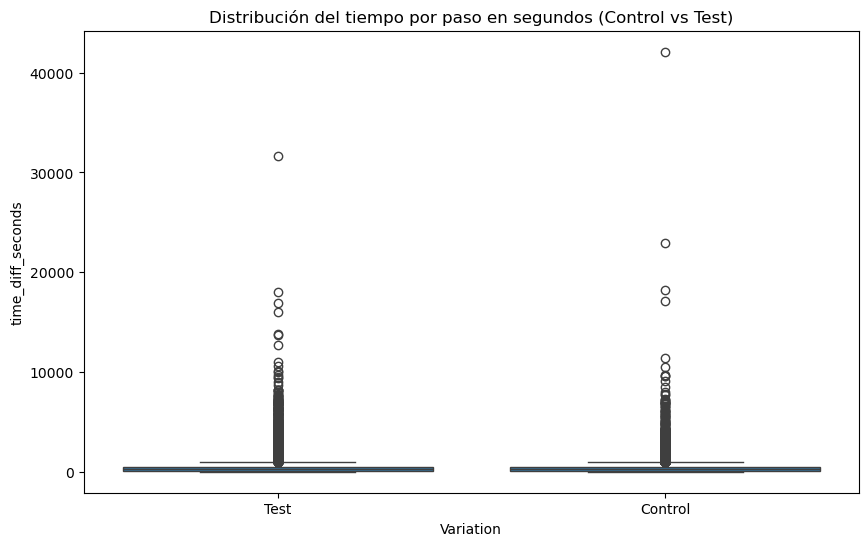

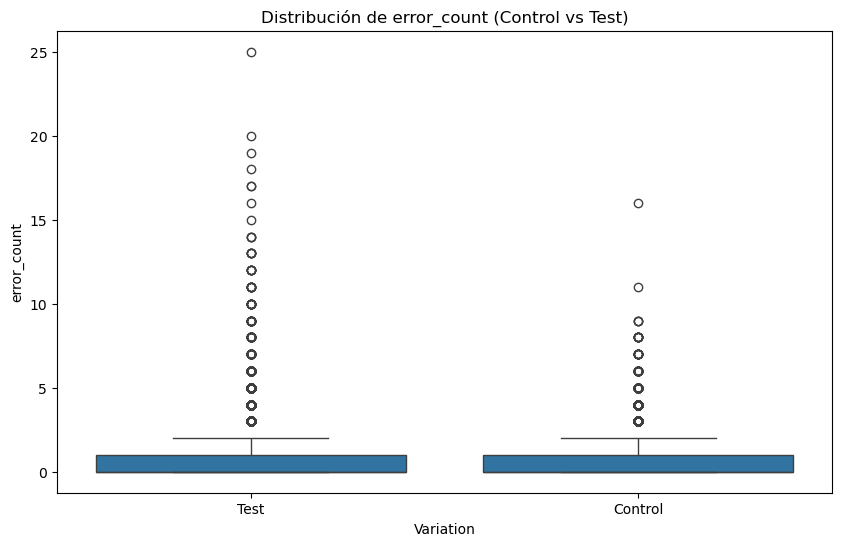

In [61]:
# Boxplot para 'time_diff_seconds' para comparar entre Control y Test
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variation', y='time_diff_seconds', data=data_summary)
plt.title('Distribución del tiempo por paso en segundos (Control vs Test)')
plt.show()

# Boxplot para 'error_count' para comparar entre Control y Test
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variation', y='error_count', data=data_summary)
plt.title('Distribución de error_count (Control vs Test)')
plt.show()

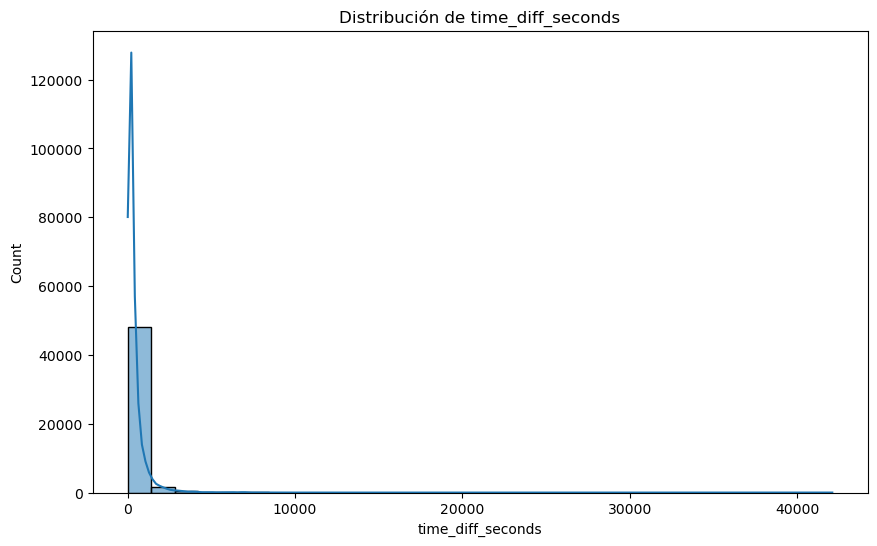

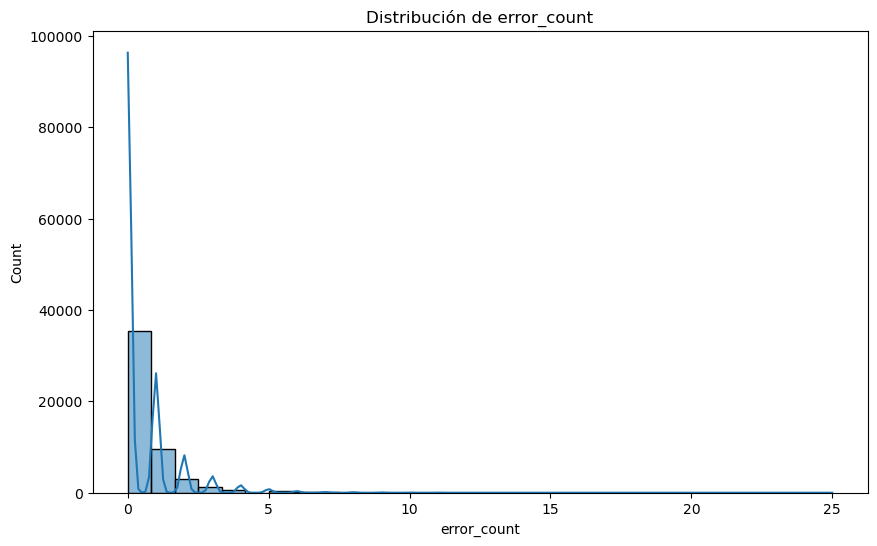

In [62]:
# Histograma para la distribución de 'time_diff_seconds'
plt.figure(figsize=(10, 6))
sns.histplot(data_summary['time_diff_seconds'], bins=30, kde=True)
plt.title('Distribución de time_diff_seconds')
plt.show()

# Histograma para la distribución de 'error_count'
plt.figure(figsize=(10, 6))
sns.histplot(data_summary['error_count'], bins=30, kde=True)
plt.title('Distribución de error_count')
plt.show()

Eliminamos los outliers de tiempo

In [63]:
Q1 = data_summary['time_diff_seconds'].quantile(0.25)
Q3 = data_summary['time_diff_seconds'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_summary = data_summary[(data_summary['time_diff_seconds'] >= lower_bound) & (data_summary['time_diff_seconds'] <= upper_bound)]

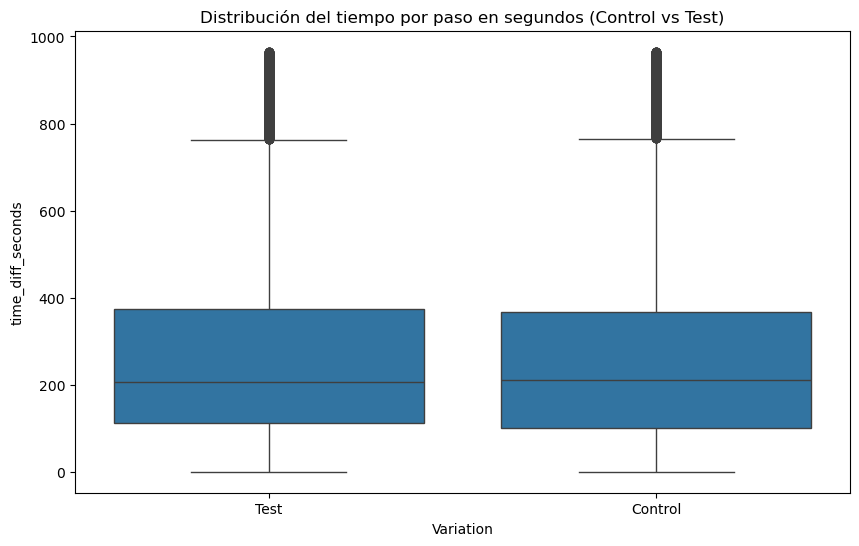

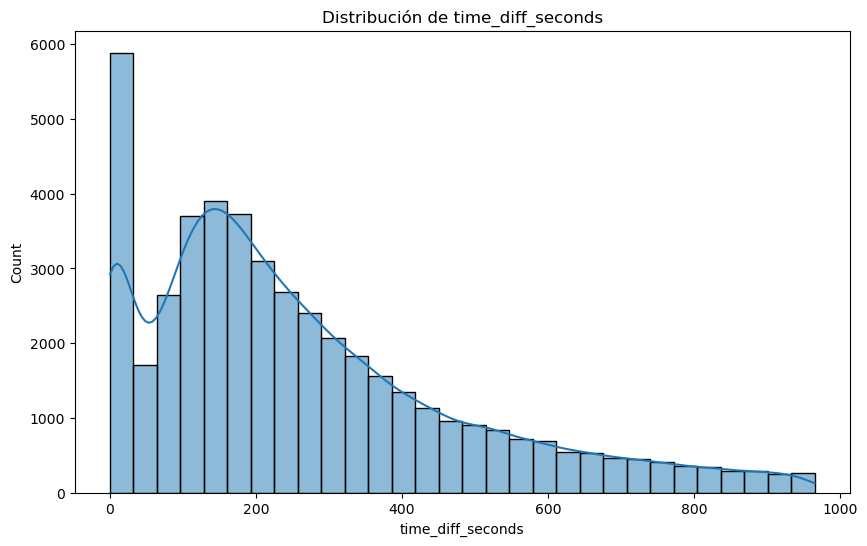

In [64]:
# Boxplot para 'time_diff_seconds' para comparar entre Control y Test
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variation', y='time_diff_seconds', data=data_summary)
plt.title('Distribución del tiempo por paso en segundos (Control vs Test)')
plt.show()

# Histograma para la distribución de 'time_diff_seconds'
plt.figure(figsize=(10, 6))
sns.histplot(data_summary['time_diff_seconds'], bins=30, kde=True)
plt.title('Distribución de time_diff_seconds')
plt.show()


## 10.2 Análisis variables categóricas

In [65]:
# Resumen de las variables categóricas
categorical_columns = ['success', 'error', 'process_step']

for col in categorical_columns:
    print(f"Distribución de {col}:")
    print(data_summary[col].value_counts())
    print("\n")

Distribución de success:
True     30594
False    15334
Name: success, dtype: int64


Distribución de error:
False    33927
True     12001
Name: error, dtype: int64


Distribución de process_step:
5    30594
1     5661
4     3883
2     3303
3     2487
Name: process_step, dtype: int64




C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18372\380849922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='success', data=data_summary, palette="coolwarm")


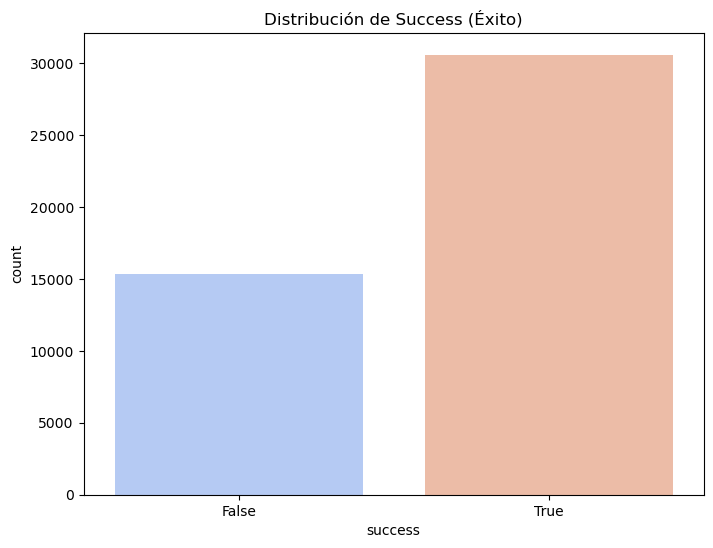

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18372\380849922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='error', data=data_summary, palette="coolwarm")


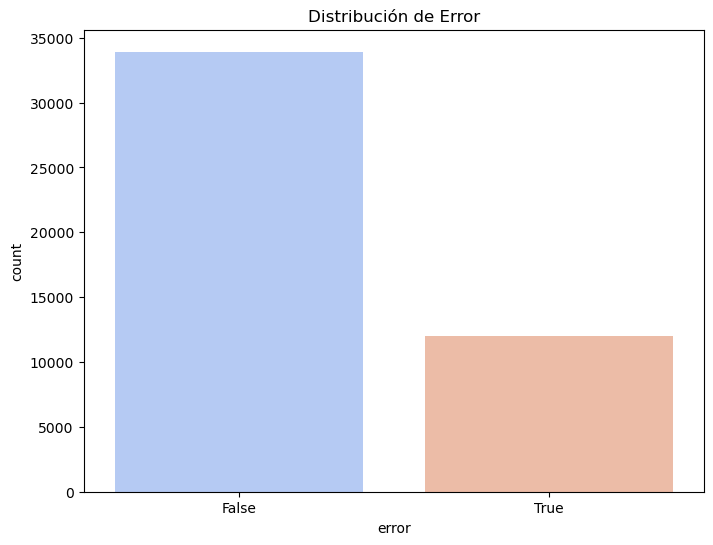

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_18372\380849922.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='process_step', data=data_summary, palette="coolwarm")


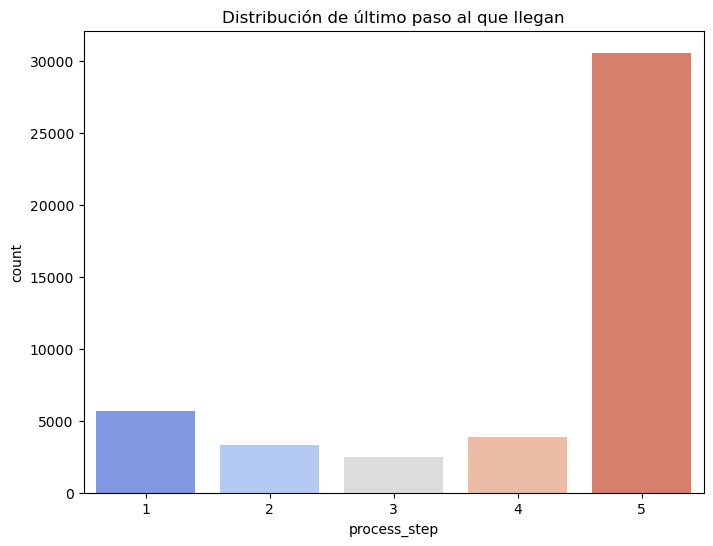

In [66]:
# Gráfico de barras para la variable 'success'
plt.figure(figsize=(8, 6))
sns.countplot(x='success', data=data_summary, palette="coolwarm")
plt.title('Distribución de Success (Éxito)')
plt.show()

# Gráfico de barras para la variable 'error'
plt.figure(figsize=(8, 6))
sns.countplot(x='error', data=data_summary, palette="coolwarm")
plt.title('Distribución de Error')
plt.show()

# Gráfico de barras para la variable 'process_step' 
plt.figure(figsize=(8, 6))
sns.countplot(x='process_step', data=data_summary, palette="coolwarm")
plt.title('Distribución de último paso al que llegan')
plt.show()

# 11. Exploramos el `time_per_client_step`

In [67]:
df_exploration(time_per_client_step)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207827 entries, 0 to 207826
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   client_id          207827 non-null  int64  
 1   process_step       207827 non-null  int64  
 2   Variation          207827 non-null  object 
 3   time_diff_seconds  207827 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.3+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id            0
process_step         0
Variation            0
time_diff_seconds    0
dtype: int64

Valores unicos: 
client_id            50500
process_step             5
Variation                2
time_diff_seconds     2742
dtype: int64


,client_id,process_step,Variation,time_diff_seconds
0,555,1,Test,7.0
1,555,2,Test,32.0
2,555,3,Test,99.0
3,555,4,Test,20.0
4,555,5,Test,0.0
...,...,...,...,...
207822,9999729,3,Test,120.0
207823,9999729,4,Test,21.0
207824,9999729,5,Test,0.0
207825,9999832,1,Test,8.0


### Analizamos los **outliers**

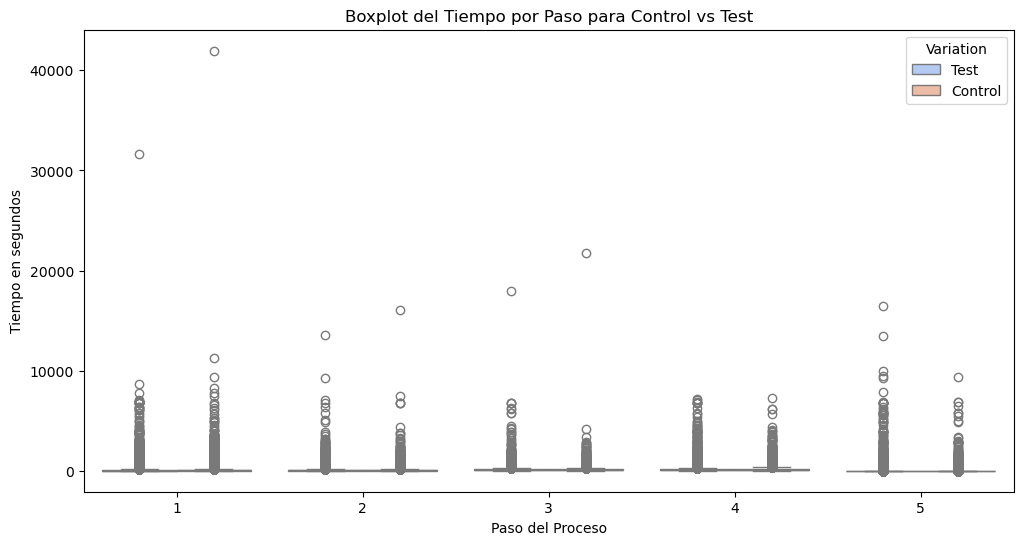

In [68]:
# Boxplot por paso y variación (Control vs Test)
plt.figure(figsize=(12, 6))
sns.boxplot(x='process_step', y='time_diff_seconds', hue='Variation', data=time_per_client_step, palette='coolwarm')
plt.title('Boxplot del Tiempo por Paso para Control vs Test')
plt.xlabel('Paso del Proceso')
plt.ylabel('Tiempo en segundos')
plt.show()

### Eliminamos los **outliers**

In [69]:
# Función para quitar outliers usando el método IQR
def remove_outliers_iqr(df, column, group_column):
    clean_df = pd.DataFrame()
    for step in df[group_column].unique():
        # Filtrar por el paso
        step_data = df[df[group_column] == step]
        
        # Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
        Q1 = step_data[column].quantile(0.25)
        Q3 = step_data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir los límites para no ser considerado un outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrar los datos que no son outliers
        step_clean_data = step_data[(step_data[column] >= lower_bound) & (step_data[column] <= upper_bound)]
        clean_df = pd.concat([clean_df, step_clean_data], ignore_index=True)
    
    return clean_df


In [70]:

# Aplicar la función para eliminar outliers en 'time_diff_seconds' por 'process_step'
time_per_client_step = remove_outliers_iqr(time_per_client_step, 'time_diff_seconds', 'process_step')

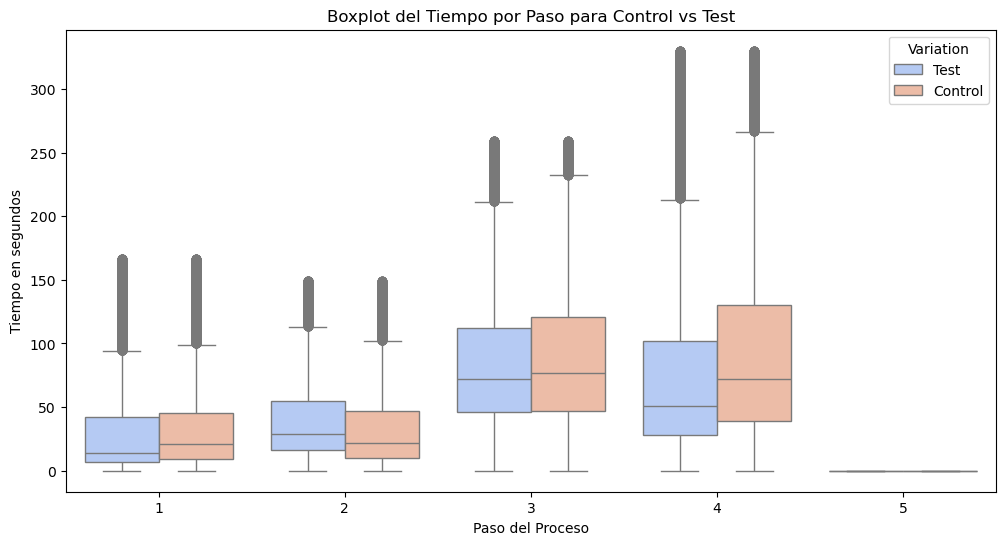

In [71]:
# Boxplot por paso y variación (Control vs Test)
plt.figure(figsize=(12, 6))
sns.boxplot(x='process_step', y='time_diff_seconds', hue='Variation', data=time_per_client_step, palette='coolwarm')
plt.title('Boxplot del Tiempo por Paso para Control vs Test')
plt.xlabel('Paso del Proceso')
plt.ylabel('Tiempo en segundos')
plt.show()

# 12. Pruebas de Hipótesis: Tasa de Finalización
Formulamos las siguientes hipótesis para comparar la tasa de finalización entre los grupos de control y prueba:
- **Hipótesis nula (H0)**: La tasa de éxito en el grupo de control es **igual** a la tasa de éxito en el grupo de prueba.
- **Hipótesis alternativa (H1)**: La tasa de éxito en el grupo de control es **diferente** a la del grupo de prueba.

In [72]:
# Crear tabla de éxito por grupo de variación
success_counts = data_summary.groupby('Variation')['success'].sum()
total_counts = data_summary.groupby('Variation')['success'].count()

''' 
control_success = test_success
control_success != test_success
'''

# Realizar la prueba Z para proporciones
stat, p_value = proportions_ztest(count=success_counts, nobs=total_counts)

print(f'Prueba Z para la tasa de éxito: Estadístico Z = {stat}, p-valor = {p_value}')

Prueba Z para la tasa de éxito: Estadístico Z = -9.283980975073778, p-valor = 1.632618930360539e-20


Existe una diferencia significativa en las tasas de éxito entre los grupos de control y prueba.

Formulamos las siguientes hipótesis
- **Hipótesis nula (H0)**: La tasa de éxito en el grupo de control es **mayor o igual** que la tasa de éxito en el grupo de prueba.
- **Hipótesis alternativa (H1)**: La tasa de éxito en el grupo de control es **menor** que la del grupo de prueba.


In [73]:
''' 
control_success >= test_success
control_success < test_success
'''

# Realizar la prueba Z para proporciones
stat, p_value = proportions_ztest(count=success_counts, nobs=total_counts, alternative= 'smaller')

print(f'Prueba Z para la tasa de éxito: Estadístico Z = {stat}, p-valor = {p_value}')

Prueba Z para la tasa de éxito: Estadístico Z = -9.283980975073778, p-valor = 8.163094651802695e-21


Podemos rechazar la hipótesis nula y concluir que la tasa de éxito en el grupo de control es significativamente menor que en el grupo de prueba.

# 13. Pruebas de Hipótesis: Tiempo de Finalización
Formulamos las siguientes hipótesis para comparar el tiempo de finalización entre los grupos de control y prueba:
- **Hipótesis nula (H0)**: El tiempo de finalización en el grupo de control es **igual** a el tiempo de finalización en el grupo de prueba.
- **Hipótesis alternativa (H1)**: El tiempo de finalización en el grupo de control es **diferente** a el del grupo de prueba.

In [74]:
# Filtrar datos por Variación
control_times = data_summary[data_summary['Variation'] == 'Control']['time_diff_seconds']
test_times = data_summary[data_summary['Variation'] == 'Test']['time_diff_seconds']

''' 
control_times = test_times
control_times != test_times
'''

# Realizar la prueba t de Student
stat, p_value = ttest_ind(control_times, test_times, equal_var=False, alternative='two-sided')
print(f'Prueba T para tiempo promedio: Estadístico t = {stat}, p-valor = {p_value}')


Prueba T para tiempo promedio: Estadístico t = -3.847127702628825, p-valor = 0.00011967461351427507


Existe una diferencia significativa en el tiempo de finalización entre los grupos de control y prueba.

Formulamos las siguientes hipótesis
- **Hipótesis nula (H0)**: El tiempo de finalización en el grupo de control es **menor o igual** que el tiempo de finalización en el grupo de prueba.
- **Hipótesis alternativa (H1)**: El tiempo de finalización en el grupo de control es **mayor** que la del grupo de prueba.

In [75]:
# Filtrar datos por Variación
control_times = data_summary[data_summary['Variation'] == 'Control']['time_diff_seconds']
test_times = data_summary[data_summary['Variation'] == 'Test']['time_diff_seconds']

''' 
control_times <= test_times
control_times > test_times
'''

# Realizar la prueba t de Student
stat, p_value = ttest_ind(control_times, test_times, equal_var=False, alternative = 'greater')
print(f'Prueba T para tiempo promedio: Estadístico t = {stat}, p-valor = {p_value}')


Prueba T para tiempo promedio: Estadístico t = -3.847127702628825, p-valor = 0.9999401626932429


No se puede rechazar la hipótesis nula.

Formulamos las siguientes hipótesis
- **Hipótesis nula (H0)**: El tiempo de finalización en el grupo de control es **mayor o igual** que el tiempo de finalización en el grupo de prueba.
- **Hipótesis alternativa (H1)**: El tiempo de finalización en el grupo de control es **menor** que la del grupo de prueba.

In [76]:
# Filtrar datos por Variación
control_times = data_summary[data_summary['Variation'] == 'Control']['time_diff_seconds']
test_times = data_summary[data_summary['Variation'] == 'Test']['time_diff_seconds']

''' 
control_times >= test_times
control_times < test_times
'''

# Realizar la prueba t de Student
stat, p_value = ttest_ind(control_times, test_times, equal_var=False, alternative = 'less')
print(f'Prueba T para tiempo promedio: Estadístico t = {stat}, p-valor = {p_value}')

Prueba T para tiempo promedio: Estadístico t = -3.847127702628825, p-valor = 5.983730675713754e-05


Podemos rechazar la hipótesis nula y concluir que los tiempos promedio en el grupo de control son significativamente menores que en el grupo de prueba.

# 14. Pruebas de Hipótesis: Tasa de Error
Formulamos las siguientes hipótesis para comparar la tasa de error entre los grupos de control y prueba:
- **Hipótesis nula (H0)**: La tasa de error en el grupo de control es **igual** a la tasa de error en el grupo de prueba.
- **Hipótesis alternativa (H1)**: La tasa de error en el grupo de control es **diferente** a la del grupo de prueba.

In [77]:
# Crear tabla de errores por grupo de variación
error_counts = data_summary.groupby('Variation')['error'].sum()
total_counts = data_summary.groupby('Variation')['error'].count()

''' 
control_error = test_error
control_error != test_error
'''

# Realizar la prueba Z para la tasa de errores
stat, p_value = proportions_ztest(count=error_counts, nobs=total_counts)

print(f'Prueba Z para la tasa de errores: Estadístico Z = {stat}, p-valor = {p_value}')

Prueba Z para la tasa de errores: Estadístico Z = -16.273398856937806, p-valor = 1.5245526970118814e-59


Existe una diferencia significativa en las tasas de error entre los grupos de control y prueba.

Formulamos las siguientes hipótesis
- **Hipótesis nula (H0)**: La tasa de error en el grupo de control es **mayor o igual** que la tasa de error en el grupo de prueba.
- **Hipótesis alternativa (H1)**: La tasa de error en el grupo de control es **menor** que la del grupo de prueba.

In [78]:
# Crear tabla de errores por grupo de variación
error_counts = data_summary.groupby('Variation')['error'].sum()
total_counts = data_summary.groupby('Variation')['error'].count()

''' 
control_error >= test_error
control_error < test_error
'''

# Realizar la prueba Z para la tasa de errores
stat, p_value = proportions_ztest(count=error_counts, nobs=total_counts, alternative =  'smaller')

print(f'Prueba Z para la tasa de errores: Estadístico Z = {stat}, p-valor = {p_value}')

Prueba Z para la tasa de errores: Estadístico Z = -16.273398856937806, p-valor = 7.622763485059407e-60


Podemos rechazar la hipótesis nula y concluir que la tasa de error en el grupo de control es significativamente menor que en el grupo de prueba.

Seguimos con los errores, pero ahora lo hacemos con los valores numericos

Formulamos las siguientes hipótesis para comparar los errores entre los grupos de control y prueba:
- **Hipótesis nula (H0)**: La tasa de error en el grupo de control es **igual** a la tasa de error en el grupo de prueba.
- **Hipótesis alternativa (H1)**: La tasa de error en el grupo de control es **diferente** a la del grupo de prueba.

In [79]:
# Filtrar datos por Variación
control_times = data_summary[data_summary['Variation'] == 'Control']['error']
test_times = data_summary[data_summary['Variation'] == 'Test']['error']

''' 
control_times = test_times
control_times != test_times
'''

# Realizar la prueba t de Student
stat, p_value = ttest_ind(control_times, test_times, equal_var=False, alternative='two-sided')
print(f'Prueba T para la tasa de errores: Estadístico t = {stat}, p-valor = {p_value}')

Prueba T para la tasa de errores: Estadístico t = -16.399285153234057, p-valor = 2.8736465458453273e-60


Existe una diferencia significativa en los errores entre los grupos de control y prueba.

Formulamos las siguientes hipótesis
- **Hipótesis nula (H0)**: La tasa de error en el grupo de control es **mayor o igual** que la tasa de error en el grupo de prueba.
- **Hipótesis alternativa (H1)**: La tasa de error en el grupo de control es **menor** que la del grupo de prueba.

In [80]:
# Filtrar datos por Variación
control_times = data_summary[data_summary['Variation'] == 'Control']['error']
test_times = data_summary[data_summary['Variation'] == 'Test']['error']

''' 
control_times >= test_times
control_times < test_times
'''

# Realizar la prueba t de Student
stat, p_value = ttest_ind(control_times, test_times, equal_var=False, alternative='less')
print(f'Prueba T para la tasa de errores: Estadístico t = {stat}, p-valor = {p_value}')

Prueba T para la tasa de errores: Estadístico t = -16.399285153234057, p-valor = 1.4368232729226636e-60


Podemos rechazar la hipótesis nula y concluir que los errores en el grupo de control son significativamente menores que en el grupo de prueba.

# 15. Pruebas de Hipótesis: Tiempo por pasos

Formulamos las siguientes hipótesis para comparar el tiempo por pasos entre los grupos de control y prueba:
- **Hipótesis nula (H0)**: El tiempo por pasos en el grupo de control es **igual** a el tiempo por pasos en el grupo de prueba.
- **Hipótesis alternativa (H1)**: El tiempo por pasos en el grupo de control es **diferente** a la del grupo de prueba.

In [81]:
# Crear un diccionario para almacenar los resultados
test_results_per_step = {}

# Iterar por cada paso del proceso (1 a 5)
for step in range(1, 6):
    control_times = time_per_client_step[(time_per_client_step['Variation'] == 'Control') & (time_per_client_step['process_step'] == step)]['time_diff_seconds']
    test_times = time_per_client_step[(time_per_client_step['Variation'] == 'Test') & (time_per_client_step['process_step'] == step)]['time_diff_seconds']
    
    # Verificar si hay suficientes datos para realizar las pruebas
    if len(control_times) > 1 and len(test_times) > 1:
        # Realizar la prueba t
        stat_t, p_value_t = ttest_ind(control_times, test_times, equal_var=False)
        
        # Almacenar los resultados
        test_results_per_step[step] = {
            'Prueba T - Estadístico t': stat_t,
            'Prueba T - p-valor': p_value_t,
       }
    else:
        test_results_per_step[step] = 'Datos insuficientes'

# Mostrar los resultados
results_df = pd.DataFrame(test_results_per_step).T
print(results_df)


   Prueba T - Estadístico t  Prueba T - p-valor
1                  3.363764        7.695313e-04
2                -19.105219        5.334596e-81
3                  6.219788        5.033030e-10
4                 20.223925        2.190191e-90
5                       NaN                 NaN


Los tiempos promedio para cada paso son significativamente diferentes entre los grupos de control y prueba. Analizamos por separado donde son mayores.

### Prueba de Hipótesis: Tiempo en el Paso 1

Formulamos las siguientes hipótesis para comparar el tiempo en el **paso 1** entre los grupos de control y prueba:
- **Hipótesis nula (H0)**: El tiempo en el paso 1 para el grupo de control es **mayor o igual** que el tiempo en el paso 1 para el grupo de prueba.
- **Hipótesis alternativa (H1)**: El tiempo en el paso 1 para el grupo de control es **menor** que el tiempo en el paso 1 para el grupo de prueba.

In [82]:
control_times = time_per_client_step[(time_per_client_step['Variation'] == 'Control') & (time_per_client_step['process_step'] == 1)]['time_diff_seconds']
test_times = time_per_client_step[(time_per_client_step['Variation'] == 'Test') & (time_per_client_step['process_step'] == 1)]['time_diff_seconds']

''' 
control_times >= test_times
control_times < test_times
'''
stat_t, p_value_t = ttest_ind(control_times, test_times, equal_var=False, alternative = 'less')
print(f'Prueba T para tiempo del paso 2: Estadístico t = {stat_t}, p-valor = {p_value_t}')

Prueba T para tiempo del paso 2: Estadístico t = 3.363764275060264, p-valor = 0.9996152343661691


No podemos rechazar la hipótesis nula

### Prueba de Hipótesis: Tiempo en el Paso 1

Formulamos las siguientes hipótesis para comparar el tiempo en el **paso 1** entre los grupos de control y prueba:
- **Hipótesis nula (H0)**: El tiempo en el paso 1 para el grupo de control es **menor o igual** que el tiempo en el paso 1 para el grupo de prueba.
- **Hipótesis alternativa (H1)**: El tiempo en el paso 1 para el grupo de control es **mayor** que el tiempo en el paso 1 para el grupo de prueba.


In [83]:
control_times = time_per_client_step[(time_per_client_step['Variation'] == 'Control') & (time_per_client_step['process_step'] == 1)]['time_diff_seconds']
test_times = time_per_client_step[(time_per_client_step['Variation'] == 'Test') & (time_per_client_step['process_step'] == 1)]['time_diff_seconds']

''' 
control_times <= test_times
control_times > test_times
'''
stat_t, p_value_t = ttest_ind(control_times, test_times, equal_var=False, alternative = 'greater')
print(f'Prueba T para tiempo del paso 2: Estadístico t = {stat_t}, p-valor = {p_value_t}')

Prueba T para tiempo del paso 2: Estadístico t = 3.363764275060264, p-valor = 0.0003847656338309138


Podemos rechazar la hipótesis nula y concluir que el tiempo en el paso 1 en el grupo de control es significativamente mayor que en el grupo de prueba.

### Prueba de Hipótesis: Tiempo en el Paso 2

Formulamos las siguientes hipótesis para comparar el tiempo en el **paso 2** entre los grupos de control y prueba:
- **Hipótesis nula (H0)**: El tiempo en el paso 2 para el grupo de control es **mayor o igual** que el tiempo en el paso 2 para el grupo de prueba.
- **Hipótesis alternativa (H1)**: El tiempo en el paso 2 para el grupo de control es **menor** que el tiempo en el paso 2 para el grupo de prueba.


In [84]:
control_times = time_per_client_step[(time_per_client_step['Variation'] == 'Control') & (time_per_client_step['process_step'] == 2)]['time_diff_seconds']
test_times = time_per_client_step[(time_per_client_step['Variation'] == 'Test') & (time_per_client_step['process_step'] == 2)]['time_diff_seconds']

''' 
control_times >= test_times
control_times < test_times
'''
stat_t, p_value_t = ttest_ind(control_times, test_times, equal_var=False, alternative = 'less')
print(f'Prueba T para tiempo del paso 2: Estadístico t = {stat_t}, p-valor = {p_value_t}')

Prueba T para tiempo del paso 2: Estadístico t = -19.105219027631954, p-valor = 2.667298231749892e-81


Podemos rechazar la hipótesis nula y concluir que el tiempo en el paso 2 en el grupo de control es significativamente menor que en el grupo de prueba.

### Prueba de Hipótesis: Tiempo en el Paso 3

Formulamos las siguientes hipótesis para comparar el tiempo en el **paso 3** entre los grupos de control y prueba:
- **Hipótesis nula (H0)**: El tiempo en el paso 3 para el grupo de control es **mayor o igual** que el tiempo en el paso 3 para el grupo de prueba.
- **Hipótesis alternativa (H1)**: El tiempo en el paso 3 para el grupo de control es **menor** que el tiempo en el paso 3 para el grupo de prueba.


In [85]:
control_times = time_per_client_step[(time_per_client_step['Variation'] == 'Control') & (time_per_client_step['process_step'] == 3)]['time_diff_seconds']
test_times = time_per_client_step[(time_per_client_step['Variation'] == 'Test') & (time_per_client_step['process_step'] == 3)]['time_diff_seconds']

''' 
control_times >= test_times
control_times < test_times
'''
stat_t, p_value_t = ttest_ind(control_times, test_times, equal_var=False, alternative = 'less')
print(f'Prueba T para tiempo del paso 2: Estadístico t = {stat_t}, p-valor = {p_value_t}')

Prueba T para tiempo del paso 2: Estadístico t = 6.219788311125855, p-valor = 0.9999999997483485


No podemos rechazar la hipótesis nula

### Prueba de Hipótesis: Tiempo en el Paso 3

Formulamos las siguientes hipótesis para comparar el tiempo en el **paso 3** entre los grupos de control y prueba:
- **Hipótesis nula (H0)**: El tiempo en el paso 3 para el grupo de control es **menor o igual** que el tiempo en el paso 3 para el grupo de prueba.
- **Hipótesis alternativa (H1)**: El tiempo en el paso 3 para el grupo de control es **mayor** que el tiempo en el paso 3 para el grupo de prueba.


In [86]:
control_times = time_per_client_step[(time_per_client_step['Variation'] == 'Control') & (time_per_client_step['process_step'] == 3)]['time_diff_seconds']
test_times = time_per_client_step[(time_per_client_step['Variation'] == 'Test') & (time_per_client_step['process_step'] == 3)]['time_diff_seconds']

''' 
control_times <= test_times
control_times > test_times
'''
stat_t, p_value_t = ttest_ind(control_times, test_times, equal_var=False, alternative = 'greater')
print(f'Prueba T para tiempo del paso 2: Estadístico t = {stat_t}, p-valor = {p_value_t}')

Prueba T para tiempo del paso 2: Estadístico t = 6.219788311125855, p-valor = 2.516515109089652e-10


Podemos rechazar la hipótesis nula y concluir que el tiempo en el paso 3 en el grupo de control es significativamente mayor que en el grupo de prueba.

### Prueba de Hipótesis: Tiempo en el Paso 4

Formulamos las siguientes hipótesis para comparar el tiempo en el **paso 4** entre los grupos de control y prueba:
- **Hipótesis nula (H0)**: El tiempo en el paso 4 para el grupo de control es **mayor o igual** que el tiempo en el paso 4 para el grupo de prueba.
- **Hipótesis alternativa (H1)**: El tiempo en el paso 4 para el grupo de control es **menor** que el tiempo en el paso 4 para el grupo de prueba.


In [87]:
control_times = time_per_client_step[(time_per_client_step['Variation'] == 'Control') & (time_per_client_step['process_step'] == 4)]['time_diff_seconds']
test_times = time_per_client_step[(time_per_client_step['Variation'] == 'Test') & (time_per_client_step['process_step'] == 4)]['time_diff_seconds']

''' 
control_times >= test_times
control_times < test_times
'''
stat_t, p_value_t = ttest_ind(control_times, test_times, equal_var=False, alternative = 'less')
print(f'Prueba T para tiempo del paso 4: Estadístico t = {stat_t}, p-valor = {p_value_t}')

Prueba T para tiempo del paso 4: Estadístico t = 20.223925078648342, p-valor = 1.0


No podemos rechazar la hipótesis nula

### Prueba de Hipótesis: Tiempo en el Paso 4

Formulamos las siguientes hipótesis para comparar el tiempo en el **paso 4** entre los grupos de control y prueba:
- **Hipótesis nula (H0)**: El tiempo en el paso 4 para el grupo de control es **menor o igual** que el tiempo en el paso 4 para el grupo de prueba.
- **Hipótesis alternativa (H1)**: El tiempo en el paso 4 para el grupo de control es **mayor** que el tiempo en el paso 4 para el grupo de prueba.


In [88]:
control_times = time_per_client_step[(time_per_client_step['Variation'] == 'Control') & (time_per_client_step['process_step'] == 4)]['time_diff_seconds']
test_times = time_per_client_step[(time_per_client_step['Variation'] == 'Test') & (time_per_client_step['process_step'] == 4)]['time_diff_seconds']

''' 
control_times <= test_times
control_times > test_times
'''
stat_t, p_value_t = ttest_ind(control_times, test_times, equal_var=False, alternative = 'greater')
print(f'Prueba T para tiempo del paso 4: Estadístico t = {stat_t}, p-valor = {p_value_t}')

Prueba T para tiempo del paso 4: Estadístico t = 20.223925078648342, p-valor = 1.0950953080890674e-90


Podemos rechazar la hipótesis nula y concluir que el tiempo en el paso 4 en el grupo de control es significativamente mayor que en el grupo de prueba.

# 16. Evaluación del Diseño del Experimento
Evaluamos la efectividad del diseño del experimento, considerando aspectos como:
- Distribución aleatoria entre los grupos de control y prueba.
- Duración del experimento: ¿Fue suficiente el periodo entre marzo y junio para recolectar datos significativos?
- Posibles sesgos o mejoras que podrían implementarse en futuros experimentos.

In [89]:
# Juntamos df_demo y df_experiment por client_id
df_combined = pd.merge(df_demo, df_experiment, on='client_id', how='left')

In [90]:
df_exploration(df_combined)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70595 entries, 0 to 70594
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70595 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70595 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
 9   Variation         50488 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 5.9+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id               0
clnt_tenure_yr          0
clnt_tenure_mnth        0
clnt_age                0
gendr                   0
num_accts               0
bal                     0
calls_6_mnth            0
logons_6_mnt

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70590,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70591,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70592,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70593,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [91]:
# Eliminar valores nulos
df_combined.dropna(inplace = True)
df_exploration(df_combined)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50488 entries, 0 to 50487
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         50488 non-null  int64  
 1   clnt_tenure_yr    50488 non-null  float64
 2   clnt_tenure_mnth  50488 non-null  float64
 3   clnt_age          50488 non-null  float64
 4   gendr             50488 non-null  object 
 5   num_accts         50488 non-null  float64
 6   bal               50488 non-null  float64
 7   calls_6_mnth      50488 non-null  float64
 8   logons_6_mnth     50488 non-null  float64
 9   Variation         50488 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 4.2+ MB
None

Valores duplicados: 0

Valores nulos: 
client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
Variation           0


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50483,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50484,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50485,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50486,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


### Prueba de Hipótesis: Relación entre Género y Variación(Control/Test)

Formulamos las siguientes hipótesis para evaluar si existe una relación significativa entre el **género** y la **variación** (grupo de control o prueba):
- **Hipótesis nula (H0)**: No hay una relación significativa entre el género y la variación; es decir, la distribución de género es **independiente** de si los clientes están en el grupo de control o de prueba.
- **Hipótesis alternativa (H1)**: Existe una relación significativa entre el género y la variación; es decir, la distribución de género **depende** de si los clientes están en el grupo de control o de prueba.


In [92]:
# Crear una tabla de contingencia para 'gendr' y 'Variation'
contingency_table_gender = pd.crosstab(df_combined['gendr'], df_combined['Variation'])

# Realizar la prueba de chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table_gender)

print(f'Prueba Chi-cuadrado para género: Chi2 = {chi2:.2f}, p-valor = {p_value:.4f}')

Prueba Chi-cuadrado para género: Chi2 = 1.89, p-valor = 0.3877


Dado que el **p-valor** es **mayor que 0.05**, no tenemos suficiente evidencia para rechazar la **hipótesis nula**. Por lo tanto, concluimos que **no existe una relación significativa** entre el género y la variación (grupo de control o prueba). En otras palabras, la distribución de género es **independiente** de si los clientes están en el grupo de control o de prueba.

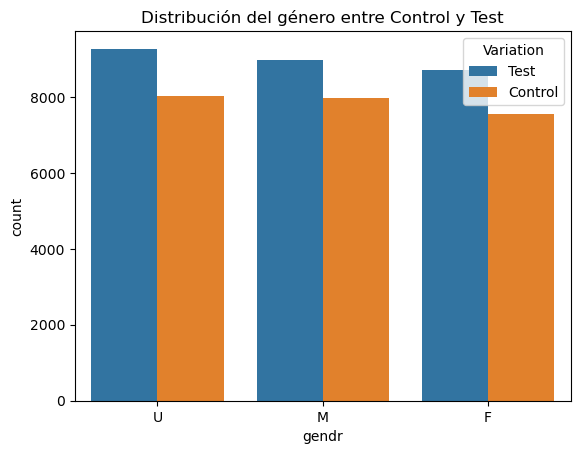

In [93]:
# Gráfico para visualizar la distribución de género
sns.countplot(x='gendr', hue='Variation', data=df_combined)
plt.title('Distribución del género entre Control y Test')
plt.show()

### Prueba de Hipótesis: Relación entre Número de Cuentas y Variación

Formulamos las siguientes hipótesis para evaluar si existe una relación significativa entre el **número de cuentas** y la **variación** (grupo de control o prueba):
- **Hipótesis nula (H0)**: No hay una relación significativa entre el número de cuentas y la variación; es decir, el número de cuentas es **independiente** de si los clientes están en el grupo de control o de prueba.
- **Hipótesis alternativa (H1)**: Existe una relación significativa entre el número de cuentas y la variación; es decir, el número de cuentas **depende** de si los clientes están en el grupo de control o de prueba.

In [94]:
# Crear una tabla de contingencia para 'num_accts' y 'Variation'
contingency_table_num_accts = pd.crosstab(df_combined['num_accts'], df_combined['Variation'])

# Realizar la prueba de chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table_num_accts)

print(f'Prueba Chi-cuadrado para num_accts: Chi2 = {chi2:.2f}, p-valor = {p_value:.4f}')

Prueba Chi-cuadrado para num_accts: Chi2 = 8.53, p-valor = 0.2019


Dado que el **p-valor** es **mayor que 0.05**, no tenemos suficiente evidencia para rechazar la **hipótesis nula**. Por lo tanto, concluimos que **no existe una relación significativa** entre el número de cuentas y la variación (grupo de control o prueba). En otras palabras, el número de cuentas es **independiente** de si los clientes están en el grupo de control o en el grupo de prueba.

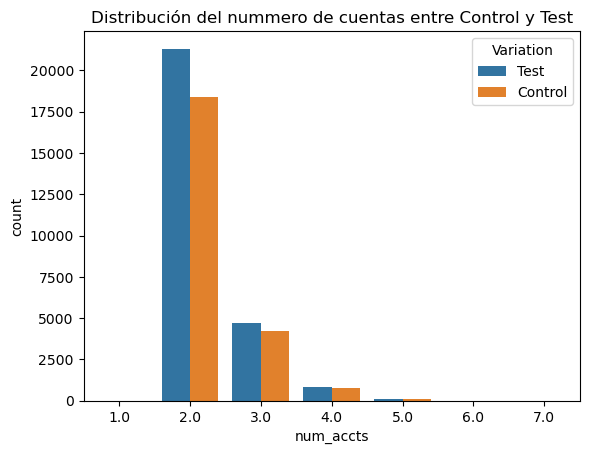

In [95]:
# Gráfico para visualizar la distribución de género
sns.countplot(x='num_accts', hue='Variation', data=df_combined)
plt.title('Distribución del nummero de cuentas entre Control y Test')
plt.show()

### Prueba de Hipótesis: Relación entre Número de Llamadas (últimos 6 meses) y Variación

Formulamos las siguientes hipótesis para evaluar si existe una relación significativa entre el **número de llamadas en los últimos 6 meses** y la **variación** (grupo de control o prueba):
- **Hipótesis nula (H0)**: No hay una relación significativa entre el número de llamadas en los últimos 6 meses y la variación; es decir, el número de llamadas es **independiente** de si los clientes están en el grupo de control o de prueba.
- **Hipótesis alternativa (H1)**: Existe una relación significativa entre el número de llamadas en los últimos 6 meses y la variación; es decir, el número de llamadas **depende** de si los clientes están en el grupo de control o de prueba.


In [96]:
# Crear una tabla de contingencia para 'calls_6_mnth' y 'Variation'
contingency_table_calls_6_mnth = pd.crosstab(df_combined['calls_6_mnth'], df_combined['Variation'])

# Realizar la prueba de chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table_calls_6_mnth)

print(f'Prueba Chi-cuadrado para calls_6_mnth: Chi2 = {chi2:.2f}, p-valor = {p_value:.4f}')

Prueba Chi-cuadrado para calls_6_mnth: Chi2 = 22.73, p-valor = 0.0009


Dado que el **p-valor** es **menor que 0.05**, rechazamos la **hipótesis nula**. Por lo tanto, concluimos que **existe una relación significativa** entre el número de llamadas en los últimos 6 meses y la variación (grupo de control o prueba). En otras palabras, el número de llamadas **depende** de si los clientes están en el grupo de control o de prueba.

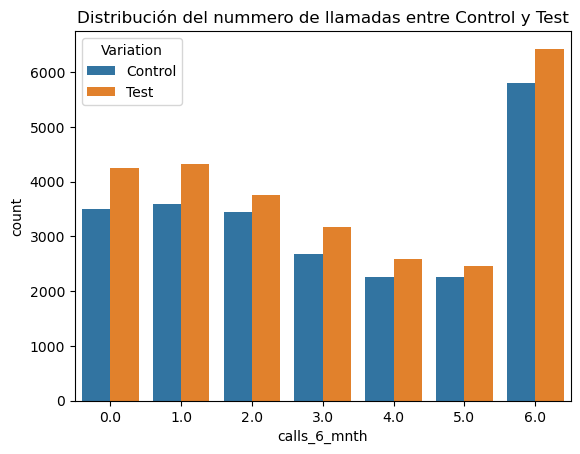

In [97]:
# Gráfico para visualizar la distribución de género
sns.countplot(x='calls_6_mnth', hue='Variation', data=df_combined)
plt.title('Distribución del nummero de llamadas entre Control y Test')
plt.show()

### Prueba de Hipótesis: Relación entre Número de Inicios de Sesión (últimos 6 meses) y Variación

Formulamos las siguientes hipótesis para evaluar si existe una relación significativa entre el **número de inicios de sesión en los últimos 6 meses** y la **variación** (grupo de control o prueba):
- **Hipótesis nula (H0)**: No hay una relación significativa entre el número de inicios de sesión en los últimos 6 meses y la variación; es decir, el número de inicios de sesión es **independiente** de si los clientes están en el grupo de control o de prueba.
- **Hipótesis alternativa (H1)**: Existe una relación significativa entre el número de inicios de sesión en los últimos 6 meses y la variación; es decir, el número de inicios de sesión **depende** de si los clientes están en el grupo de control o de prueba.


In [98]:
# Crear una tabla de contingencia para 'calls_6_mnth' y 'Variation'
contingency_table_logons_6_mnth = pd.crosstab(df_combined['logons_6_mnth'], df_combined['Variation'])

# Realizar la prueba de chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table_logons_6_mnth)

print(f'Prueba Chi-cuadrado para logons_6_mnth: Chi2 = {chi2:.2f}, p-valor = {p_value:.4f}')

Prueba Chi-cuadrado para logons_6_mnth: Chi2 = 21.38, p-valor = 0.0016


Dado que el **p-valor** es **menor que 0.05**, rechazamos la **hipótesis nula**. Por lo tanto, concluimos que **existe una relación significativa** entre el número de inicios de sesión en los últimos 6 meses y la variación (grupo de control o prueba). En otras palabras, el número de inicios de sesión **depende** de si los clientes están en el grupo de control o en el grupo de prueba.

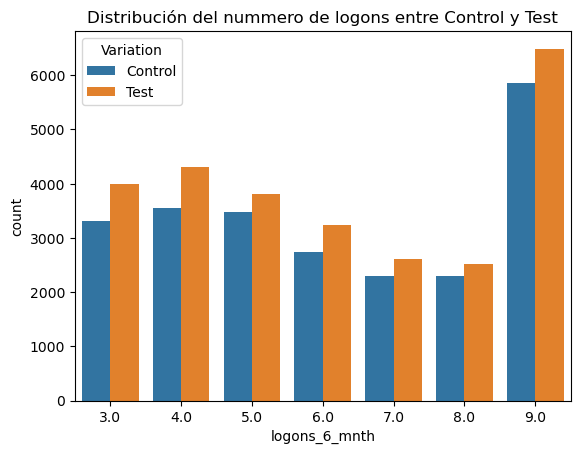

In [99]:
# Gráfico para visualizar la distribución de logons
sns.countplot(x='logons_6_mnth', hue='Variation', data=df_combined)
plt.title('Distribución del nummero de logons entre Control y Test')
plt.show()

### Prueba de Hipótesis: Comparación de Edad entre Grupos

Las hipótesis son:
- **Hipótesis nula (H0)**: La **distribución** de la edad es **igual** en el grupo de control y en el grupo de prueba.
- **Hipótesis alternativa (H1)**: La **distribución** de la edad es **diferente** entre el grupo de control y el grupo de prueba.


In [100]:
# Filtrar los datos por grupo de variación
control_age = df_combined[df_combined['Variation'] == 'Control']['clnt_age']
test_age = df_combined[df_combined['Variation'] == 'Test']['clnt_age']

# Realizar la prueba t
stat, p_value = ttest_ind(control_age, test_age, equal_var=False)
print(f'Prueba T para la edad: Estadístico t = {stat}, p-valor = {p_value}')

# Prueba de Mann-Whitney (no paramétrica)
mw_stat, p_value_mw = mannwhitneyu(control_age, test_age)
print(f'Prueba Mann-Whitney: Estadístico U = {mw_stat}, p-valor = {p_value_mw}')

Prueba T para la edad: Estadístico t = 2.415662642860989, p-valor = 0.015710198909007333
Prueba Mann-Whitney: Estadístico U = 321142141.5, p-valor = 0.014675079505236102


Dado que el **p-valor es menor que 0.05**, rechazamos la **hipótesis nula**. Por lo tanto, concluimos que existe una **diferencia significativa** en la **distribución** de la edad entre el grupo de control y el grupo de prueba.

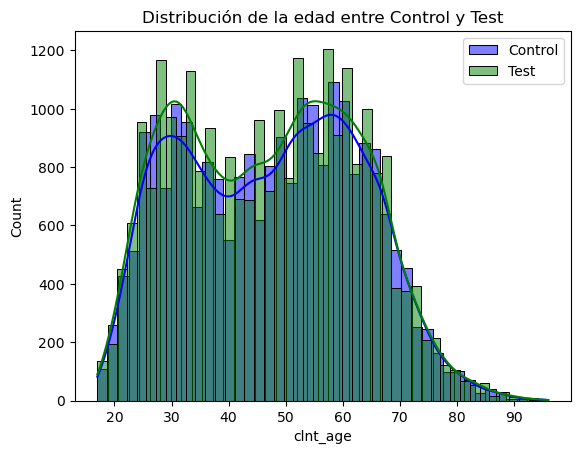

In [101]:
# Gráfico para visualizar la distribución de edad
sns.histplot(df_combined[df_combined['Variation'] == 'Control']['clnt_age'], color='blue', label='Control', kde=True)
sns.histplot(df_combined[df_combined['Variation'] == 'Test']['clnt_age'], color='green', label='Test', kde=True)
plt.legend()
plt.title('Distribución de la edad entre Control y Test')
plt.show()

### Prueba de Hipótesis: Comparación de Antigüedad entre Grupos

Las hipótesis son:
- **Hipótesis nula (H0)**: La **distribución** de la antigüedad es **igual** en el grupo de control y en el grupo de prueba.
- **Hipótesis alternativa (H1)**: La **distribución** de la antigüedad es **diferente** entre el grupo de control y el grupo de prueba.

In [102]:
# Filtrar los datos por grupo de variación
control_tenure_mnth = df_combined[df_combined['Variation'] == 'Control']['clnt_tenure_mnth']
test_tenure_mnth = df_combined[df_combined['Variation'] == 'Test']['clnt_tenure_mnth']

# Realizar la prueba t
stat, p_value = ttest_ind(control_tenure_mnth, test_tenure_mnth, equal_var=False)
print(f'Prueba T para la edad: Estadístico t = {stat:.2f}, p-valor = {p_value:.4f}')

# Prueba de Mann-Whitney (no paramétrica)
mw_stat, p_value_mw = mannwhitneyu(control_tenure_mnth, test_tenure_mnth)
print(f'Prueba Mann-Whitney: Estadístico U = {mw_stat}, p-valor = {p_value_mw}')

Prueba T para la edad: Estadístico t = 1.65, p-valor = 0.0988
Prueba Mann-Whitney: Estadístico U = 319941707.5, p-valor = 0.08811469650926139


Dado que el **p-valor es mayor que 0.05**, no tenemos suficiente evidencia para rechazar la **hipótesis nula**. Por lo tanto, concluimos que **no existe una diferencia significativa** en la **distribución** de la antigüedad entre el grupo de control y el grupo de prueba.

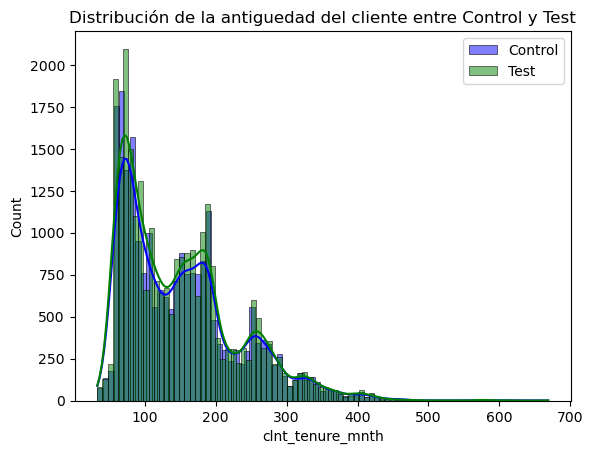

In [103]:
# Gráfico para visualizar la distribución de la antiguedad del cliente
sns.histplot(df_combined[df_combined['Variation'] == 'Control']['clnt_tenure_mnth'], color='blue', label='Control', kde=True)
sns.histplot(df_combined[df_combined['Variation'] == 'Test']['clnt_tenure_mnth'], color='green', label='Test', kde=True)
plt.legend()
plt.title('Distribución de la antiguedad del cliente entre Control y Test')
plt.show()

### Prueba de Hipótesis: Comparación de Balance entre Grupos

Las hipótesis son:
- **Hipótesis nula (H0)**: La **distribución** del balance es **igual** en el grupo de control y en el grupo de prueba.
- **Hipótesis alternativa (H1)**: La **distribución** del balance es **diferente** entre el grupo de control y el grupo de prueba.


In [104]:
# Filtrar los datos por grupo de variación
control_bal = df_combined[df_combined['Variation'] == 'Control']['bal']
test_bal = df_combined[df_combined['Variation'] == 'Test']['bal']

# Realizar la prueba t
stat, p_value = ttest_ind(control_bal, test_bal, equal_var=False)
print(f'Prueba T para el balance: Estadístico t = {stat:.2f}, p-valor = {p_value:.4f}')

# Prueba de Mann-Whitney (no paramétrica)
mw_stat, p_value_mw = mannwhitneyu(control_bal, test_bal)
print(f'Prueba Mann-Whitney: Estadístico U = {mw_stat}, p-valor = {p_value_mw}')

Prueba T para el balance: Estadístico t = 0.44, p-valor = 0.6594
Prueba Mann-Whitney: Estadístico U = 319515677.0, p-valor = 0.14857335097172644


Dado que el **p-valor es mayor que 0.05**, no tenemos suficiente evidencia para rechazar la **hipótesis nula**. Por lo tanto, concluimos que **no existe una diferencia significativa** en la **distribución** del balance entre el grupo de control y el grupo de prueba.

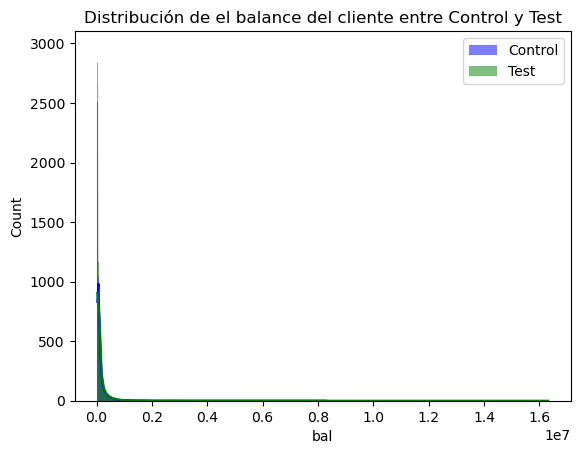

In [105]:
# Gráfico para visualizar la distribución de el balance
sns.histplot(df_combined[df_combined['Variation'] == 'Control']['bal'], color='blue', label='Control', kde=True)
sns.histplot(df_combined[df_combined['Variation'] == 'Test']['bal'], color='green', label='Test', kde=True)
plt.legend()
plt.title('Distribución de el balance del cliente entre Control y Test')
plt.show()